In [4]:
# face plotting function
import matplotlib.pyplot as plt
colors = {'baseline':'dodgerblue','laserHI': 'darkgreen', 'laserLO': 'lightgreen', 'laserCTRL': 'gray','shock':'red', 'shockCTRL': 'orange',
         'squeak' : 'purple', 'squeakCTRL': 'pink'}
def plot(d,n,c,batch):
    plt.scatter(x=d.loc[n, ['Ear1.X', 'Ear2.X', 'Ear3.X', \
                    'Ear4.X', 'Ear5.X', 'Eye1.X', 'Eye2.X', 'Eye3.X',\
                    'Eye4.X', 'SnoutMid.X', 'NoseTip.X', 'Mouth.X']], y=-d.loc[n, ['Ear1.Y', 'Ear2.Y', 'Ear3.Y', \
                    'Ear4.Y', 'Ear5.Y', 'Eye1.Y', 'Eye2.Y', 'Eye3.Y',\
                    'Eye4.Y', 'SnoutMid.Y', 'NoseTip.Y', 'Mouth.Y']], color=c)
    plt.plot(d.loc[n, ['Ear1.X', 'Ear2.X', 'Ear3.X', \
                    'Ear4.X', 'Ear5.X','Ear1.X']],-d.loc[n, ['Ear1.Y', 'Ear2.Y', 'Ear3.Y', \
                    'Ear4.Y', 'Ear5.Y','Ear1.Y']], color=c)
    plt.plot(d.loc[n, ['Eye1.X', 'Eye2.X', 'Eye3.X',\
                    'Eye4.X','Eye1.X']],-d.loc[n, ['Eye1.Y', 'Eye2.Y', 'Eye3.Y',\
                    'Eye4.Y','Eye1.Y']], color=c)
    plt.plot(d.loc[n, ['SnoutMid.X', 'NoseTip.X', 'Mouth.X']],-d.loc[n, ['SnoutMid.Y', 'NoseTip.Y', 'Mouth.Y']], color=c)
    if(str(batch) == "2"):
        plt.ylim(-d.at[0,"Ear1.Y"] - 110 ,-d.at[0,"Ear3.Y"] + 60)
    elif(str(batch) == "1"):
        plt.ylim(-255,-145)
        
    plt.xticks([], [])
    plt.yticks([], [])
plt.show()

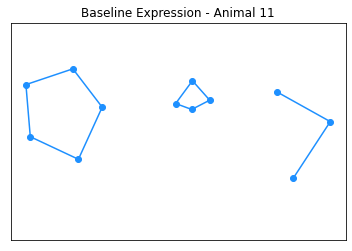

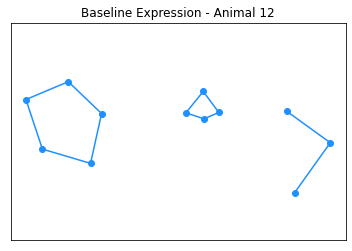

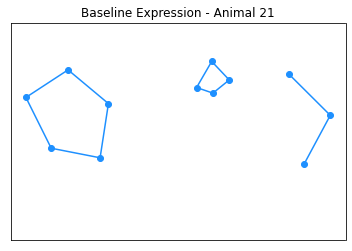

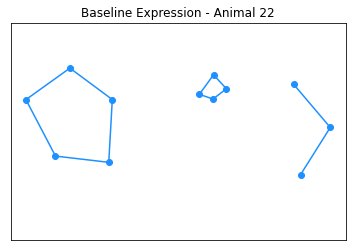

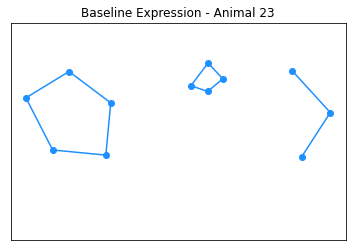

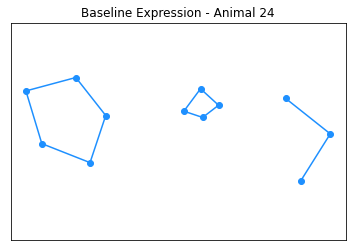

In [5]:
# Baseline expression visualization
import pandas as pd
def my_baseline_expression(batch, animall):
    
    my_baseline = pd.read_csv("Batch" + str(batch) + "/BaselineExpression" + str(batch) + str(animall) + ".csv")
    plot(my_baseline, 0, 'dodgerblue',batch)
    plt.title("Baseline Expression - Animal " + str(batch) + str(animall))
    plt.xticks([], [])
    plt.yticks([], [])
    if(str(animall) == "1" and str(batch) == "1"):
        plt.savefig('presentation_baseline1.eps', format='eps')
    elif(str(animall) == "2" and str(batch) == "1"):
        plt.savefig('presentation_baseline2.eps', format='eps')
    plt.show()

for (batch,animall) in [(1,1),(1,2),(2,1),(2,2),(2,3),(2,4)]:
    my_baseline_expression(batch, animall)


First Tried Leonardo's style of Mahalanobis Distance (two 12 dim vectors), but wasnt better than the initial way (one 24 dim vectors where X and Y are basically flattened)

       Ear1.X     Ear1.Y      Ear2.X      Ear2.Y      Ear3.X      Ear3.Y  \
0  508.007473  190.87755  490.411871  174.758761  467.985568  183.783594   

       Ear4.X      Ear4.Y      Ear5.X      Ear5.Y  ...      Eye3.X  \
0  476.711216  208.869924  502.168667  216.083167  ...  552.600204   

       Eye3.Y      Eye4.X      Eye4.Y  SnoutMid.X  SnoutMid.Y   NoseTip.X  \
0  190.518463  562.228251  193.540644  606.060121  189.790934  628.988206   

    NoseTip.Y     Mouth.X     Mouth.Y  
0  205.644262  610.152922  230.879466  

[1 rows x 24 columns]
   shock
0   1068
1   1601
2   1949
3   2472
4   6009
5   3188
6   3980
7   4514
8   4939
9   5183


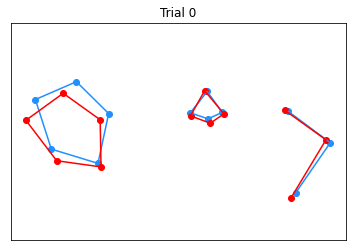

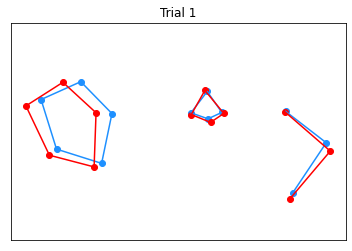

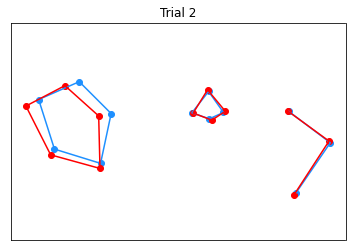

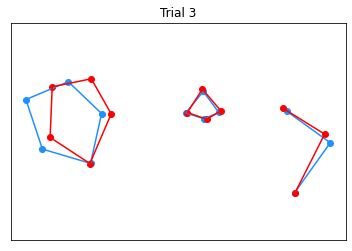

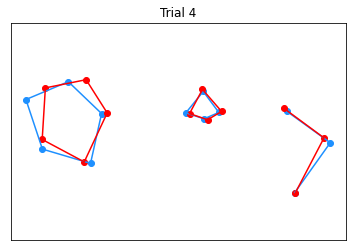

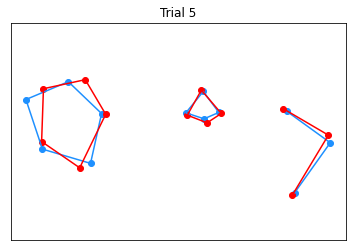

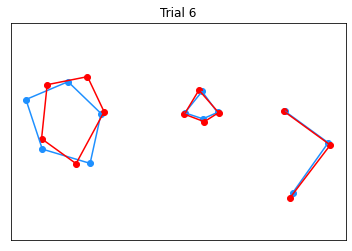

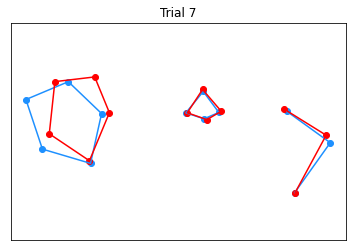

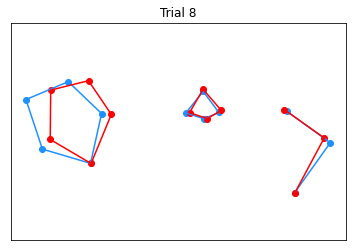

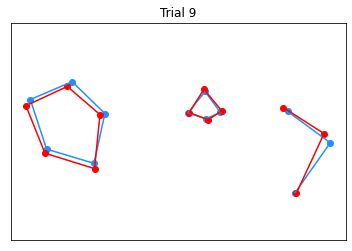

Frame of Maximum Expression
  shock
0  1081
1  1607
2  1950
3  2489
4  6016
5  3196
6  4003
7  4532
8  4949
9  5183


In [7]:
#Function plotting maximal Mahalanobis facial expression vs fixed baseline
from scipy.spatial import distance
import math
import numpy as np

def mahalanobis_maximal(batch, animall):
    df = pd.read_csv("Batch" + str(batch) + "/OutputAnimal" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_start = pd.read_csv("Batch" + str(batch) + "/list_start" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_end = pd.read_csv("Batch" + str(batch) + "/list_end" + str(batch) + str(animall) + ".csv", index_col = 0)
    my_baseline = pd.read_csv("Batch" + str(batch) + "/BaselineExpression" + str(batch) + str(animall) + ".csv", index_col = 0)
    print(my_baseline)
    #covariance matrix for Mahalanobis distance
    copy_df = pd.DataFrame.copy(df, deep = True)
    copy_df = copy_df.dropna()
    cov = np.cov(copy_df.values.T)
    inv_cov = np.linalg.inv(cov)
    
    #dropping the missing stimuli for animal 4 - laser
    list_start = list_start.dropna(axis = 1)
    
    #not interested in squeak expressions atm
    list_start = list_start.drop(columns = ["squeak","squeakCTRL"]) #["squeak","squeakCTRL"]
    
    print(list_start)
    max_expression = pd.DataFrame(index = list_start.index, columns = list_start.columns)
    for y in list_start.columns:
        for z in list_start.index:
            maxx = 0
            flag = 0
            for frame in range(int(list_start.at[z,y]),int(list_end.at[z,y]+1)):
                summ = distance.mahalanobis(df.loc[frame].to_numpy(), my_baseline.loc[0].to_numpy(), inv_cov)
                if(summ > maxx):
                    maxx = summ
                    flag = frame
            max_expression.at[z,y] = flag
            #print(distance.mahalanobis(df.loc[flag].to_numpy(), my_baseline.loc[0].to_numpy(), inv_cov))
            #plt.title("For Stimulus " + str(y)+" trial "+str(z) + " - frame with maximum expression is " + str(flag))
            plt.title("Trial " + str(z))
            plot(my_baseline, 0, 'dodgerblue', batch)
            plot(df, flag, colors.get(y), batch)
            plt.show()
    
    print("Frame of Maximum Expression")
    print(max_expression)
    #dataframe with frame number of maximum expression for each trial and each stimulus
    #max_expression.to_csv("Batch" + str(batch) + "/Frames_Maximal_Expressions_Animal" + str(batch) + str(animall) + ".csv")

mahalanobis_maximal(batch = "1", animall = "2")
#mahalanobis_maximal(batch = "2", animall = "1")
#mahalanobis_maximal(batch = "2", animall = "2")
#mahalanobis_maximal(batch = "2", animall = "3")
#mahalanobis_maximal(batch = "2", animall = "4")

       Ear1.X     Ear1.Y      Ear2.X      Ear2.Y      Ear3.X      Ear3.Y  \
0  508.007473  190.87755  490.411871  174.758761  467.985568  183.783594   

       Ear4.X      Ear4.Y      Ear5.X      Ear5.Y  ...      Eye3.X  \
0  476.711216  208.869924  502.168667  216.083167  ...  552.600204   

       Eye3.Y      Eye4.X      Eye4.Y  SnoutMid.X  SnoutMid.Y   NoseTip.X  \
0  190.518463  562.228251  193.540644  606.060121  189.790934  628.988206   

    NoseTip.Y     Mouth.X     Mouth.Y  
0  205.644262  610.152922  230.879466  

[1 rows x 24 columns]
(24, 24)
Stimulus  laserHI


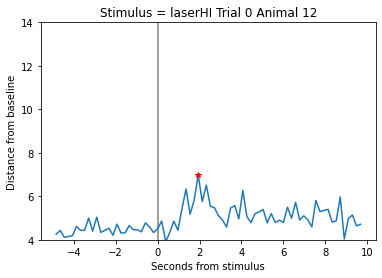

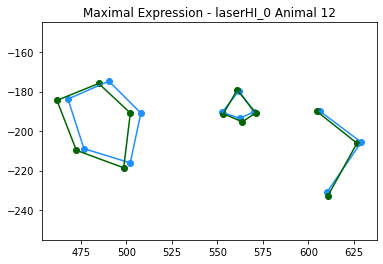

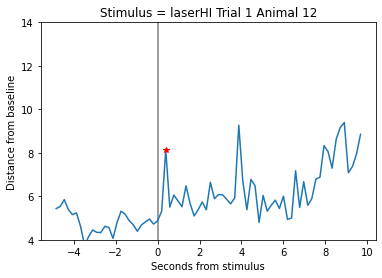

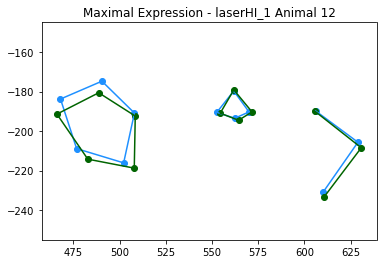

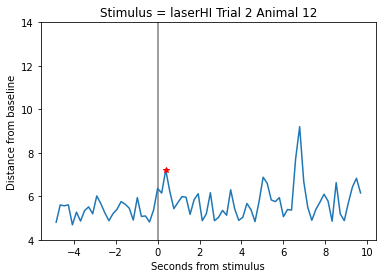

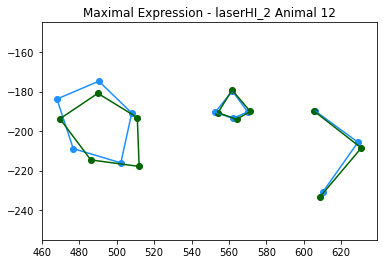

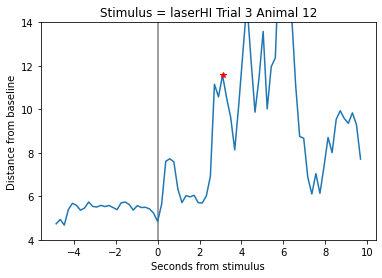

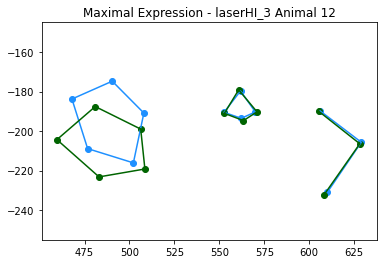

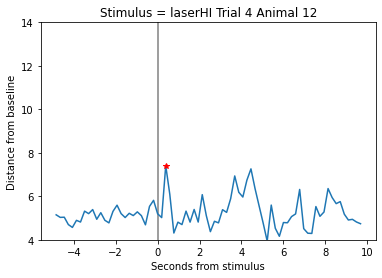

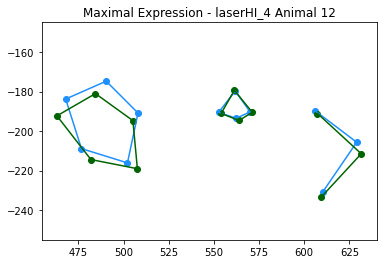

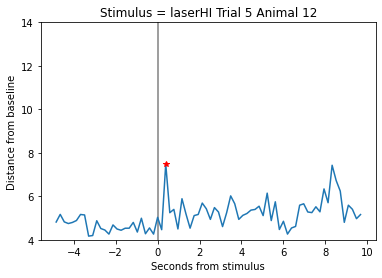

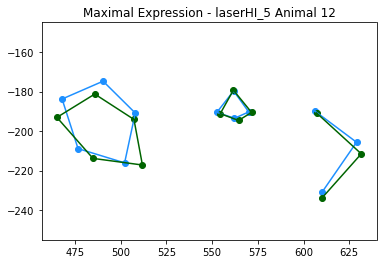

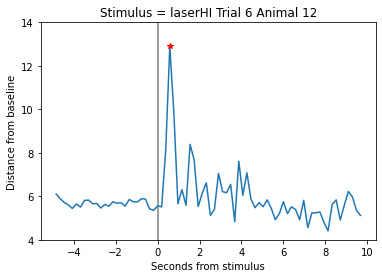

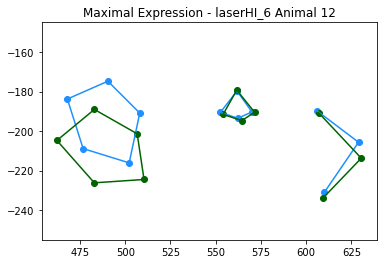

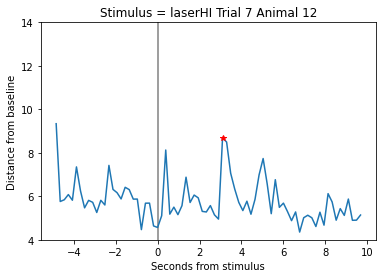

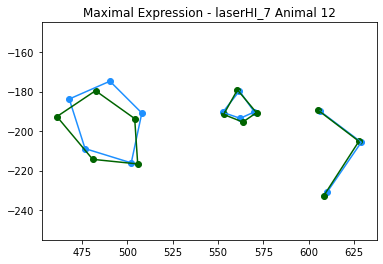

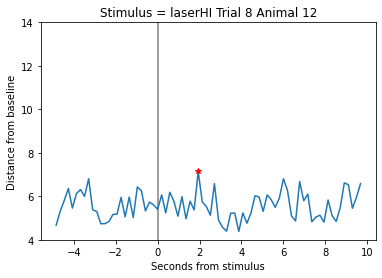

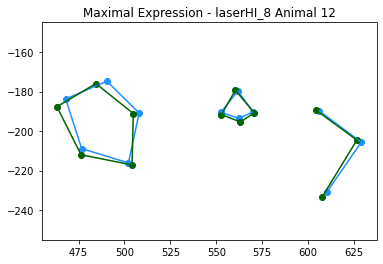

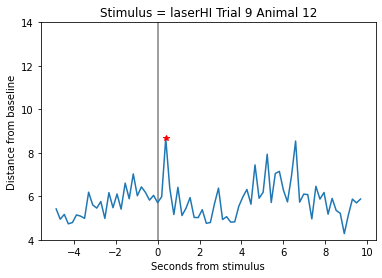

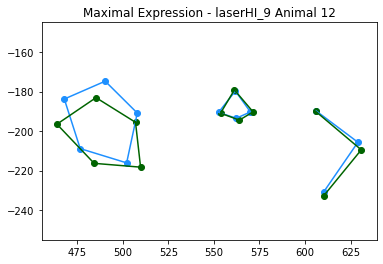

Stimulus  laserLO


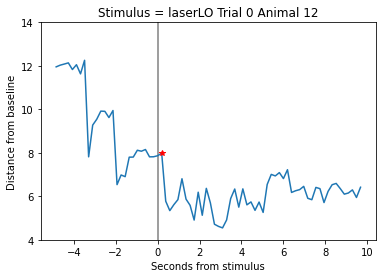

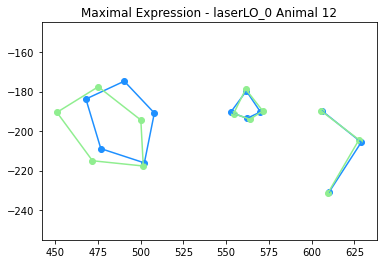

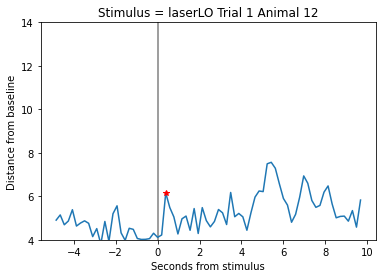

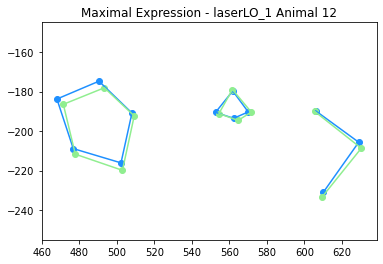

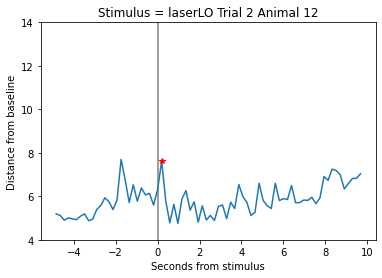

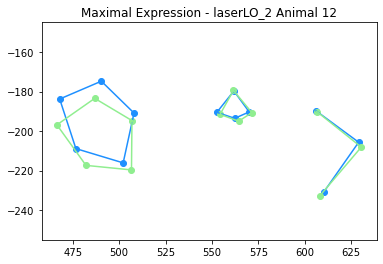

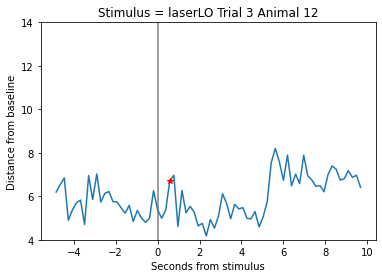

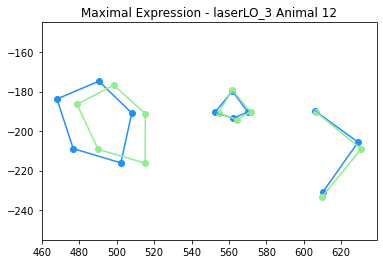

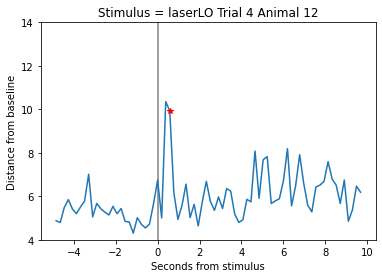

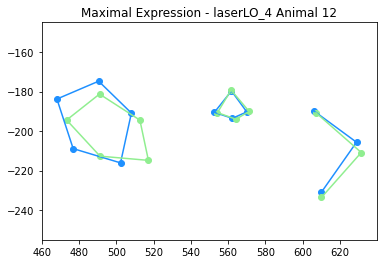

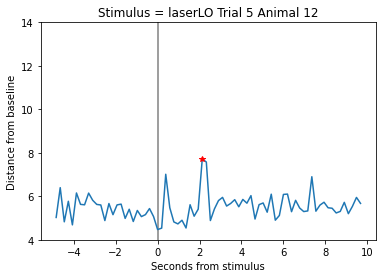

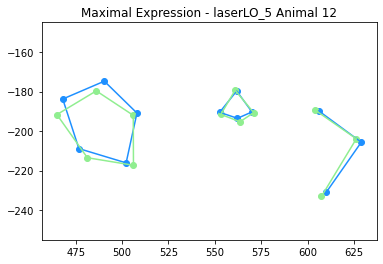

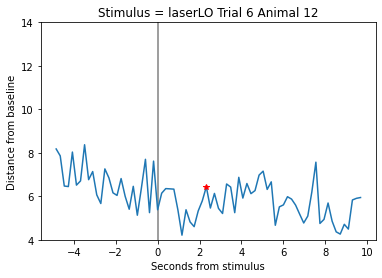

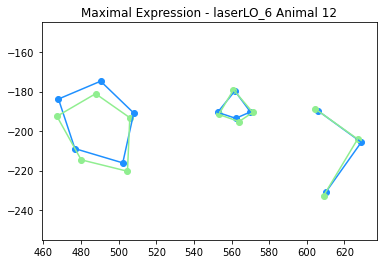

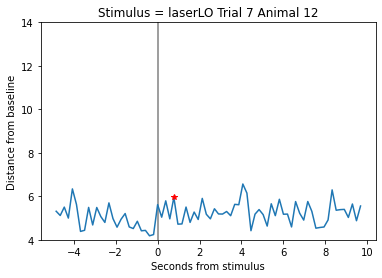

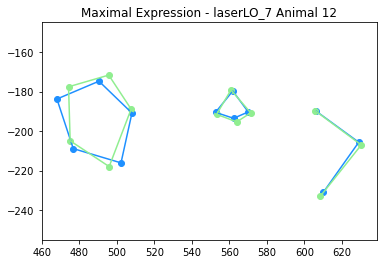

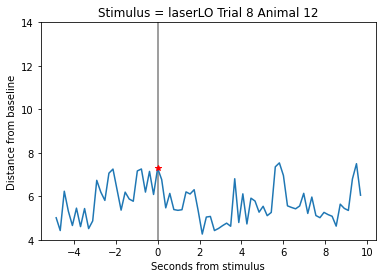

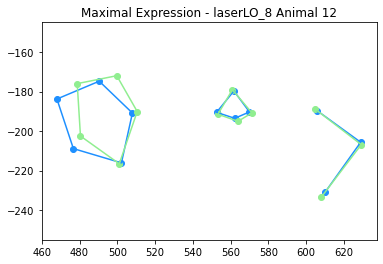

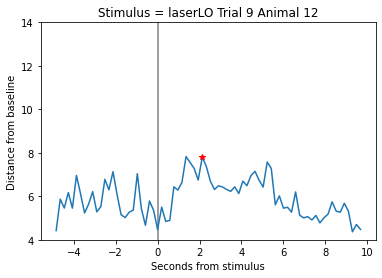

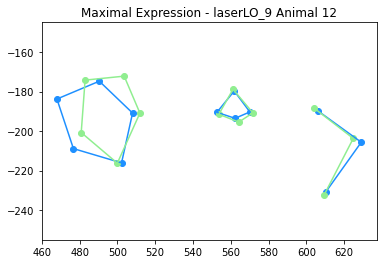

Stimulus  laserCTRL


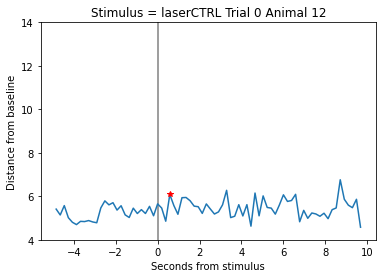

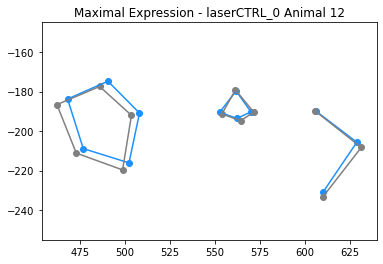

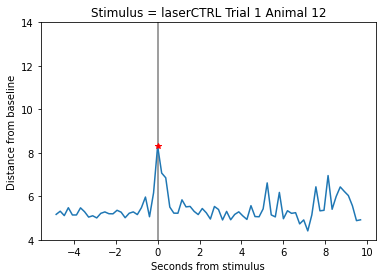

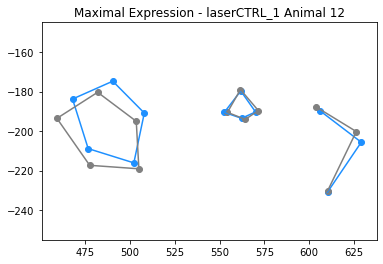

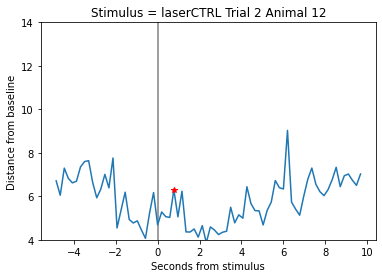

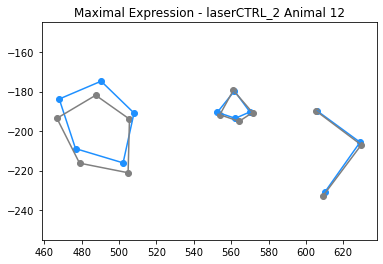

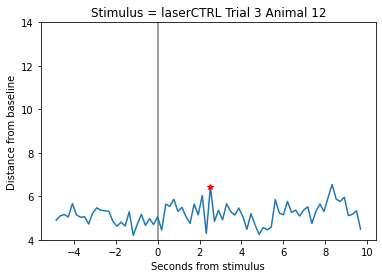

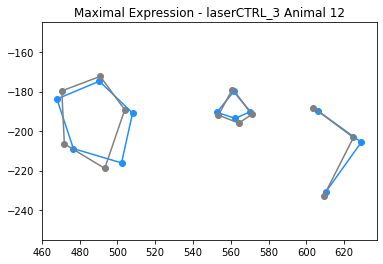

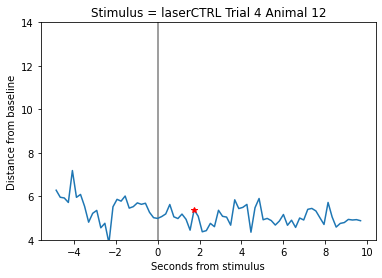

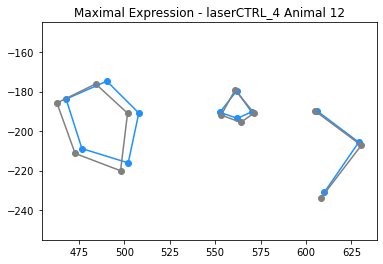

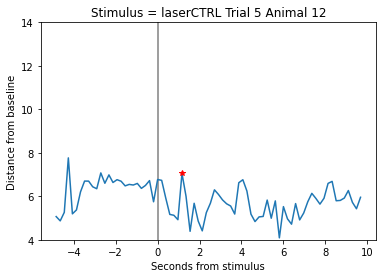

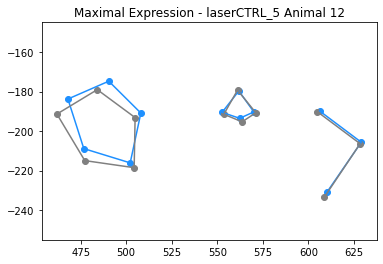

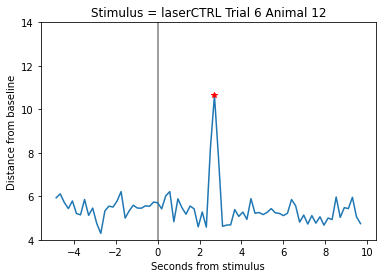

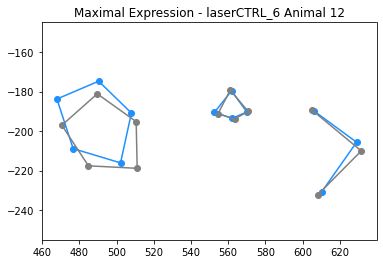

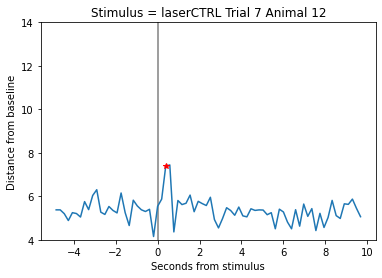

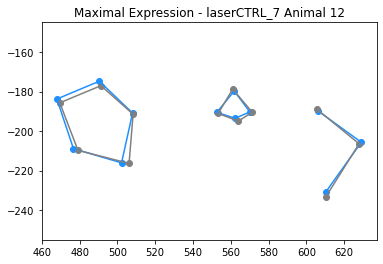

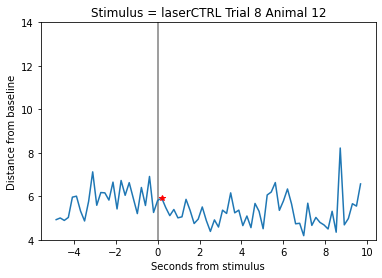

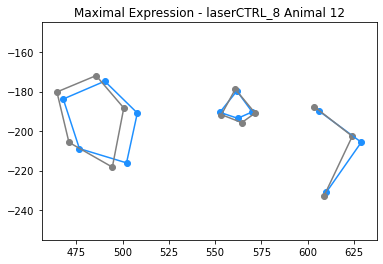

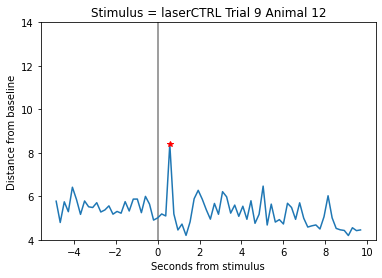

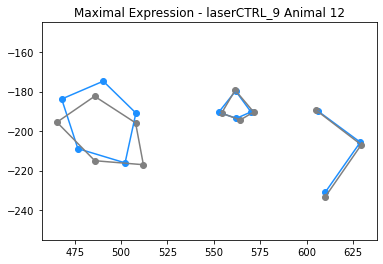

Stimulus  shock


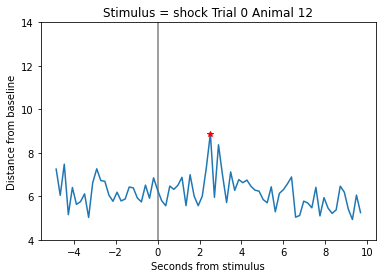

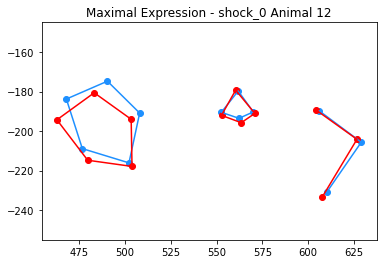

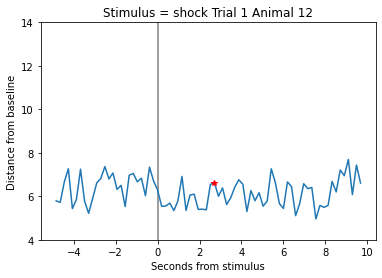

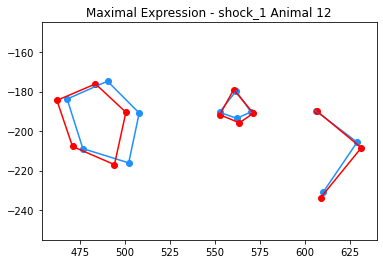

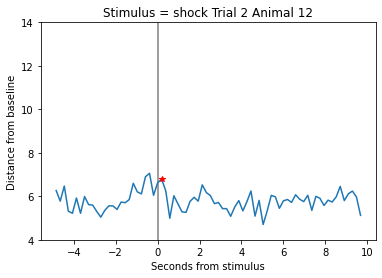

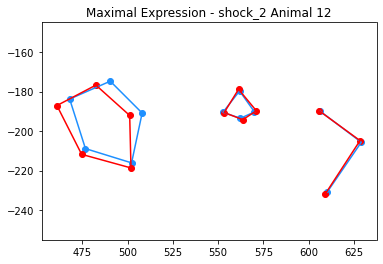

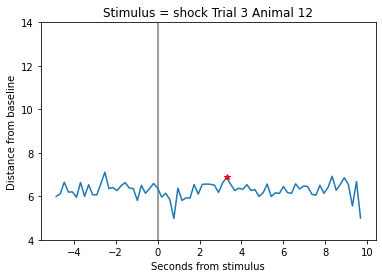

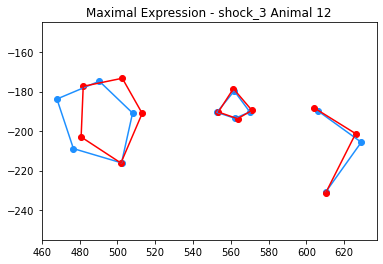

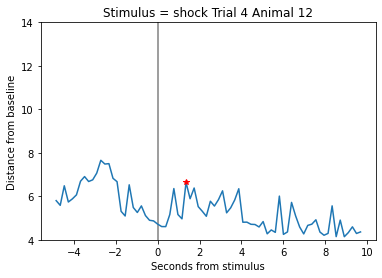

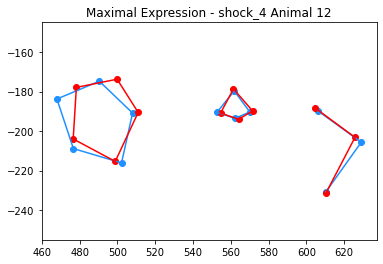

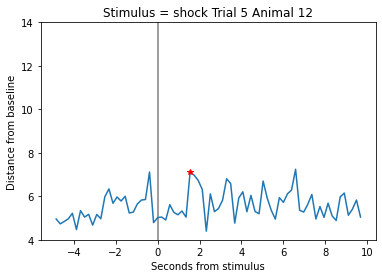

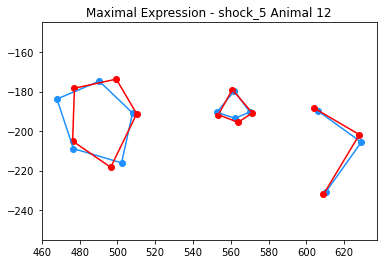

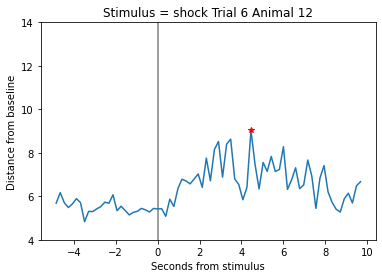

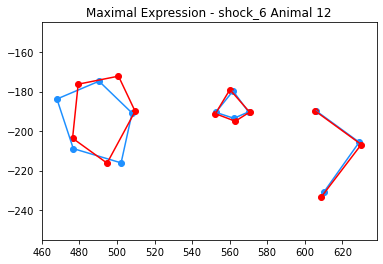

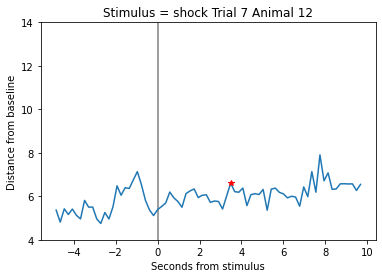

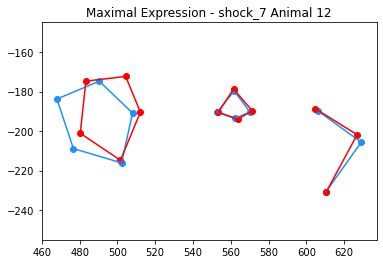

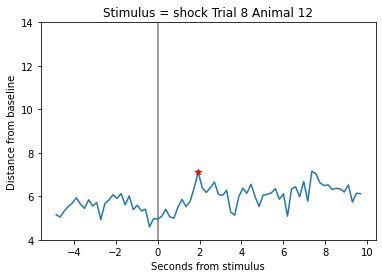

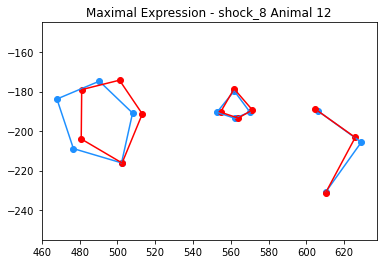

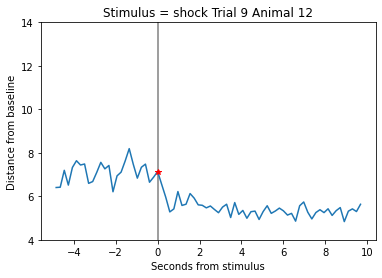

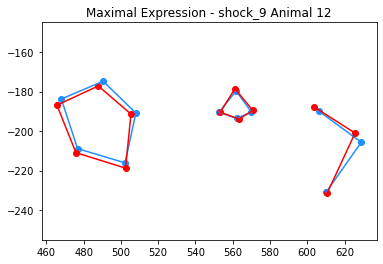

Stimulus  shockCTRL


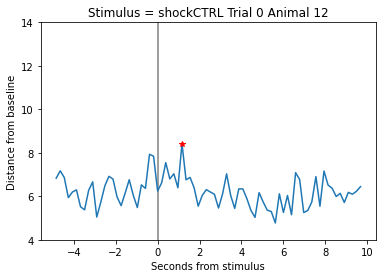

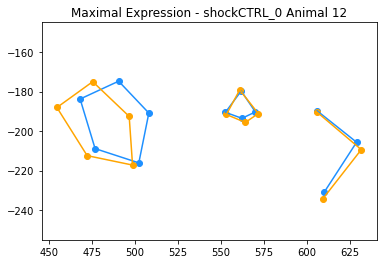

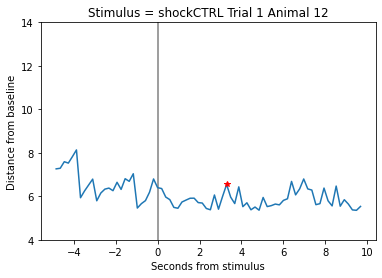

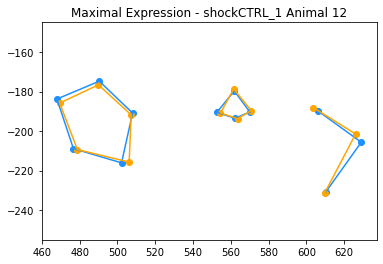

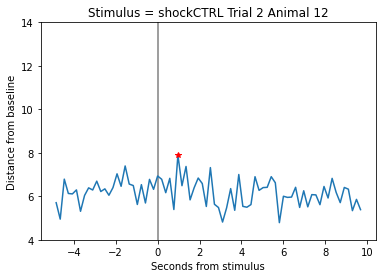

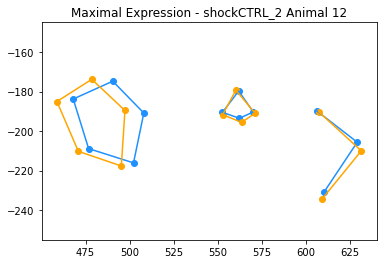

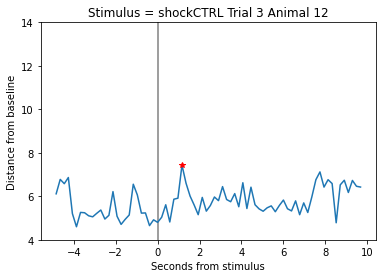

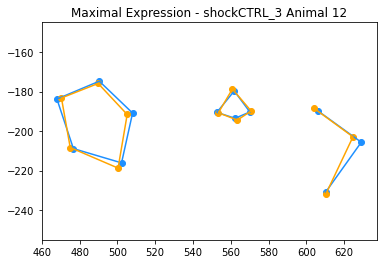

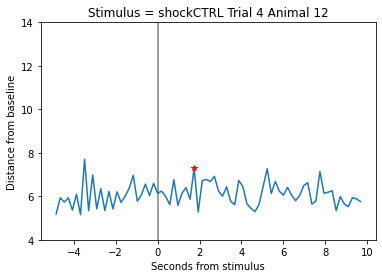

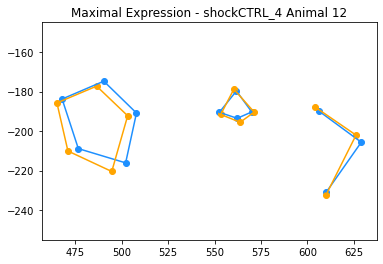

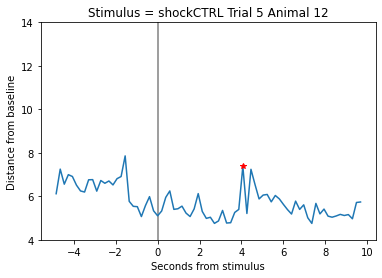

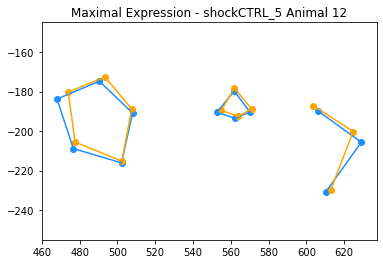

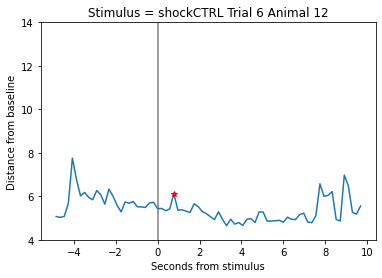

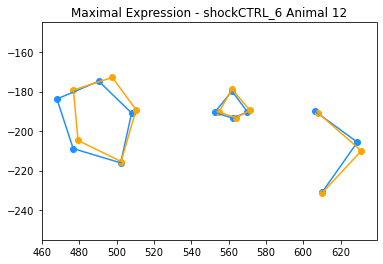

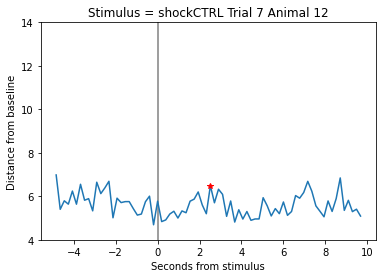

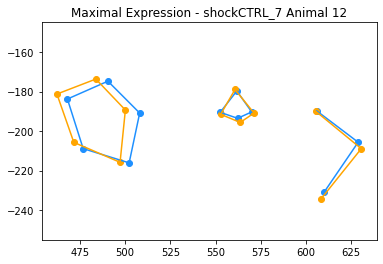

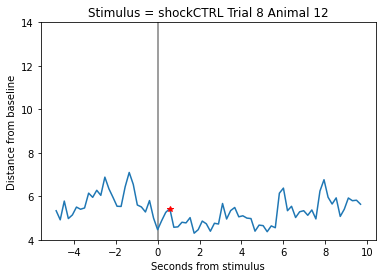

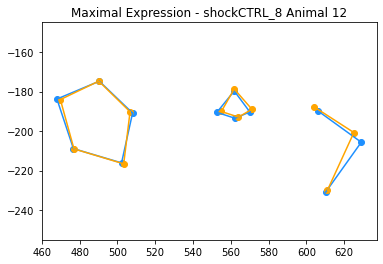

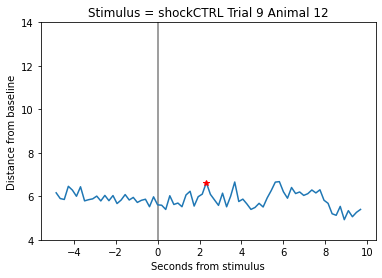

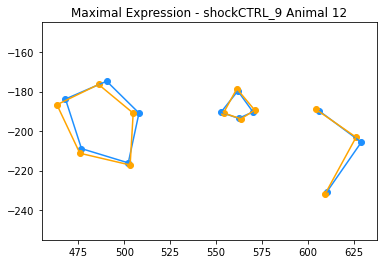

In [100]:
fps = 15.49/3
from scipy.signal import find_peaks
# Checking what happens at each peak - what facial expressions etc (especially for shock)
def mahalanobis_all_peaks(batch, animall):
    #Distance between each frame and baseline as a time function for 10 sec after stimulus starts and 3 seconds before
    df = pd.read_csv("Batch" + str(batch) + "/OutputAnimal" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_start = pd.read_csv("Batch" + str(batch) + "/list_start" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_end = pd.read_csv("Batch" + str(batch) + "/list_end" + str(batch) + str(animall) + ".csv", index_col = 0)
    my_baseline = pd.read_csv("Batch" + str(batch) + "/BaselineExpression" + str(batch) + str(animall) + ".csv", index_col = 0)
    print(my_baseline)
    max_expression = pd.read_csv("Batch" + str(batch) + "/Frames_Maximal_Expressions_Animal" + str(batch) + str(animall) + ".csv", index_col = 0)
    
    #covariance matrix for Mahalanobis distance
    copy_df = pd.DataFrame.copy(df, deep = True)
    copy_df = copy_df.dropna()
    cov = np.cov(copy_df.values.T)
    inv_cov = np.linalg.inv(cov)
    print(cov.shape)
    
    #dropping the missing stimuli for animal 4 - laser
    list_start = list_start.dropna(axis = 1)
    list_start = list_start.drop(columns = ["squeak","squeakCTRL"]) #"laserHI","laserLO","laserCTRL"
    for y in list_start.columns:
        print("Stimulus ", y)
        mah_distance = pd.DataFrame(index = range(-int(fps*5),int(fps*10)), columns = range(0,10))
        for z in list_start.index:
            start = int(list_start.at[z,y]) - int(fps*5)
            stop = int(list_start.at[z,y]) + int(fps*10)
            comparison = []
            for frame in range(start,stop):
                summ = distance.mahalanobis(df.loc[frame].to_numpy(), my_baseline.loc[0].to_numpy(), inv_cov)
                comparison.append(summ)
                mah_distance.at[frame-int(list_start.at[z,y]),z] = summ
            #plt.axvline(list_start.at[z,y], c = 'gray')
            #plt.axvline(list_end.at[z,y],c = 'gray')
            #plt.plot(range(start,stop), comparison)
            #plt.title("Stimulus " + str(y)+ "_" + str(z) + "  Animal " + batch + str(animall))
            #plt.plot(max_expressions.at[z,y], comparison[int(max_expressions.at[z,y]-start)], 'r*')
            #plt.ylim(4,14)
            #plt.xlabel('Frame number')
            #plt.ylabel("Distance from baseline")
            #plt.show()
        
        #Plotting only certain trials (later or earlier)
        #mah_distance = mah_distance.iloc[:,:5]
        
        for z in list_start.index:
            listt = mah_distance.loc[:,z].tolist()
            listt = [x for x in listt if x != np.nan]
            if(y in ["laserCTRL","shock","shockCTRL"]):
                peaks, _ = find_peaks(listt, height=5.5, distance = 2, prominence = 0.1)
            elif(y in ["laserHI","laserLO"]):
                peaks, _ = find_peaks(listt, height=6, distance = 2, prominence = 0.3)
            plt.axvline(0, c = 'gray')
            #plt.axvline((list_end.at[z,y]-list_start.at[z,y])/fps,c = 'gray')
            listtt = list(range(-25,51))
            listtt = [x/fps for x in listtt]
            plt.plot(listtt, mah_distance.loc[:,z])
            plt.title("Stimulus = " + str(y)+ " Trial " + str(z) + " Animal " + batch + str(animall))
            #for x in peaks:
            #    plt.plot(x-25,mah_distance.at[x-25,z],"r*")
            plt.plot((max_expression.at[z,y]-list_start.at[z,y])/fps,mah_distance.at[max_expression.at[z,y]-list_start.at[z,y],z],"r*")
            plt.ylim(4,14)
            plt.xlabel('Seconds from stimulus')
            plt.ylabel("Distance from baseline")
            if(batch == "1" and animall == "1" and y == "laserHI" and z == 7):
                plt.savefig('presentation_lasertrial7_animal11.eps', format='eps')
            if(batch == "1" and animall == "2" and y == "shock" and z == 5):
                plt.savefig('presentation_shocktrial5_animal12.eps', format='eps')
            plt.show()
            
            plot(my_baseline, 0, 'dodgerblue', batch)
            plot(df, max_expression.at[z,y], colors.get(y), batch)
            plt.title("Maximal Expression - " + y + "_" + str(z) + " Animal " + str(batch) + str(animall))
            if(batch == "1" and animall == "2" and y == "shock" and z == 5):
                plt.savefig('presentation_shocktrial5_animal12_face.eps', format='eps')
            if(batch == "1" and animall == "1" and y == "laserHI" and z == 7):
                plt.savefig('presentation_lasertrial7_animal11_face.eps', format='eps')
            plt.show()
            
            
            
            #for x in peaks:
            #    if(x-25 > - 5 and x-25 < 40):
            #        plt.title("For Stimulus " + str(y)+" trial "+str(z) + " - peak is " + str(x-25) + " frame " + str(list_start.at[z,y] + x - 25))
            #        plot(my_baseline, 0, 'dodgerblue')
            #        plot(df, list_start.at[z,y]+x-25, c = colors.get(y))
            #        plt.show()
mahalanobis_all_peaks("1", "2")      
#mahalanobis_all_peaks("2", "1")
#mahalanobis_all_peaks("2", "3")

   laserHI  laserLO  laserCTRL  shock  shockCTRL
0     7486     7098       7752    707        961
1     8030     8512       8239   1153       1360
2     9105     9367       8782   1827       1625
3     9981     9656      10232   2366       2148
4    10732    10955      10466   2599       2904
5    11526    11197      11787   3132       3335
6    12311    12093      12505   3910       3635
7    13148    13361      12791   4215       4510
8    13688    13973      14167   5018       4759
9    14796    14567      14339   5231       5469


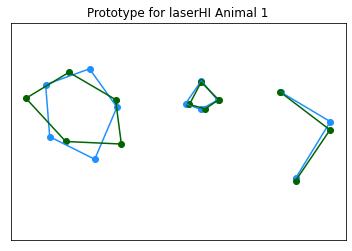

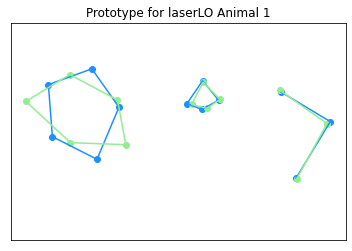

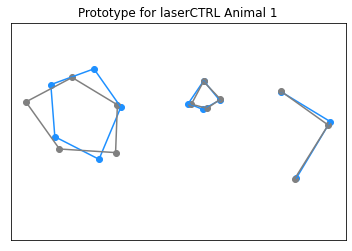

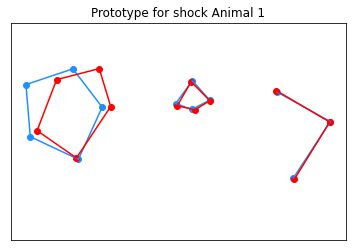

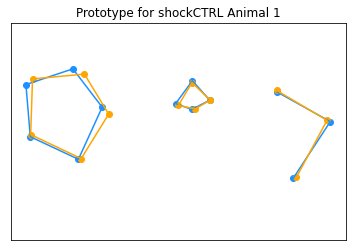

   laserHI  laserLO  laserCTRL  shock  shockCTRL
0     7912     8182       7626   1068        896
1     8803     8385       8631   1601       1383
2     9605     9087       9286   1949       1783
3     9858    10473      10179   2472       2167
4    10795    11345      11047   6009       2908
5    12163    11884      11624   3188       3504
6    12944    12521      12733   3980       3675
7    13872    13603      13169   4514       4214
8    14676    14365      14110   4939       4716
9    15135    15491      15767   5183       5359


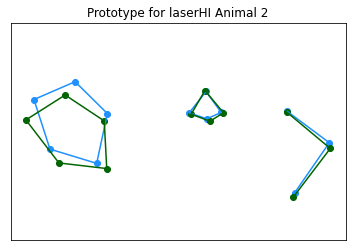

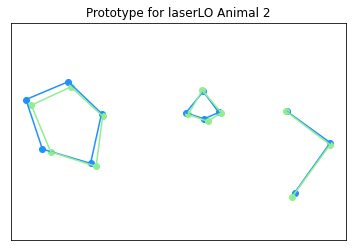

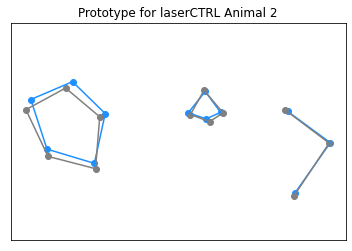

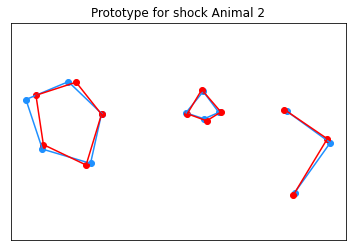

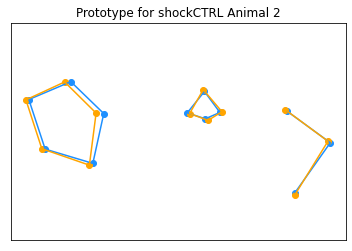

Ear1.X   Ear1.Y   Ear2.X   Ear2.Y   Ear3.X   Ear3.Y   Ear4.X  \
laserHI    506.288    194.6  484.989  181.501  463.604  194.093  481.586   
laserLO    508.603  192.219  491.722  177.382  470.871  186.673   481.07   
laserCTRL  505.056  192.524  486.702  177.968  465.368  188.904  477.231   
shock      507.968  191.264  494.525  175.028  473.287  181.636  477.224   
shockCTRL  503.916  190.643  487.111  174.892  466.433  183.945  474.922   

            Ear4.Y   Ear5.X   Ear5.Y  ...   Eye3.X   Eye3.Y   Eye4.X   Eye4.Y  \
laserHI     215.87  507.664  218.704  ...  553.681  191.187  563.924  194.784   
laserLO    210.219  505.113  217.658  ...  553.834  191.284  564.102  194.817   
laserCTRL  212.545  502.781  218.771  ...  553.786  191.377  564.079  194.974   
shock      206.594  499.822  216.919  ...  553.354  190.981  563.603  194.554   
shockCTRL  208.668  500.332  216.986  ...  553.862  190.876  563.746  194.322   

          SnoutMid.X SnoutMid.Y NoseTip.X NoseTip.Y  Mouth.X  Mouth.Y  
laserHI      605.765    190.131   629.508   208.541  609.317  233.182  
laserLO      605.401    189.589   628.844   206.659  608.949   232.85  
laserCTRL    604.811     189.12    628.39   205.839  609.274  232.806  
shock        604.763    188.895   627.418   203.654  609.471  232.065  
shockCTRL    604.951    188.931   627.746   204.879  610.006  232.115  

[5 rows x 24 columns]

In [8]:
# prototype defined as average of maximal expressions across trials of a certain stimulus
def prototype_mahalanobis(batch, animall):
    df = pd.read_csv("Batch" + str(batch) + "/OutputAnimal" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_start = pd.read_csv("Batch" + str(batch) + "/list_start" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_end = pd.read_csv("Batch" + str(batch) + "/list_end" + str(batch) + str(animall) + ".csv", index_col = 0)
    my_baseline = pd.read_csv("Batch" + str(batch) + "/BaselineExpression" + str(batch) + str(animall) + ".csv", index_col = 0)
    max_expression_times = pd.read_csv("Batch" + str(batch) + "/Frames_Maximal_Expressions_Animal" + str(batch) + str(animall) + ".csv", index_col = 0)
    
    list_start = list_start.dropna(axis = 1)
    list_start = list_start.drop(columns = ["squeak","squeakCTRL"])
    print(list_start)
    prototypes_animal = pd.DataFrame(index = list_start.columns, columns = my_baseline.columns)
    for y in list_start.columns:
        max_expr = pd.DataFrame(columns = df.columns, index = list_start.index)
        for z in list_start.index:
            max_expr.loc[z,:] = df.loc[max_expression_times.at[z,y],:]
        prototype = pd.DataFrame(max_expr.mean()).T
        plot(my_baseline,0,'dodgerblue',batch)
        plot(prototype,0,colors.get(y),batch)
        plt.title("Prototype for " + str(y)  + " Animal " + animall)
        plt.savefig('presentation_prototype_' + str(y) + '_animal1' + str(animall) +'.eps', format='eps')
        plt.show()
        prototypes_animal.loc[y,:] = prototype.loc[0,:]
        
    
    #prototypes_animal.to_csv("Batch" + str(batch) + "/Prototypes_Animal" + str(batch) + str(animall) + ".csv")
    # Not sure yet how to form them

    return prototypes_animal
prototype_mahalanobis("1", "1")
prototype_mahalanobis("1", "2")
#prototype_mahalanobis("2", "1")
#prototype_mahalanobis("2", "2")
#prototype_mahalanobis("2", "3")
#prototype_mahalanobis("2", "4")

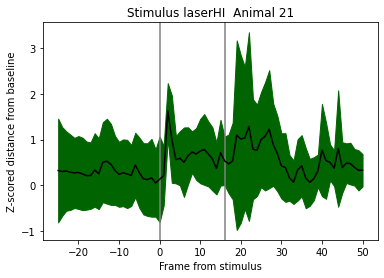

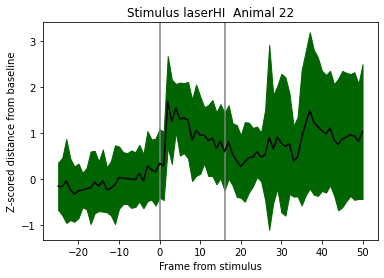

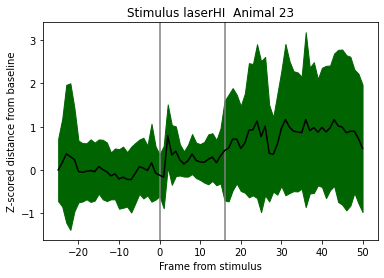

0         1         2          3         4           5         6  \
-25   0.692428  0.936565 -0.696939  -0.146403  0.252794    0.362542   -0.9034   
-24    0.30474   1.32557 -0.723493    2.48443 -0.314577  0.00657303 -0.684919   
-23   0.300248   1.54685 -0.750557    4.63481 -0.301671    0.148644 -0.876355   
-22  0.0597492   1.29427 -0.875297    4.94588  -0.47549  -0.0612637 -0.846587   
-21  0.0294135   1.01032 -0.497742    3.28711  -0.48385    0.550562 -0.702091   
..         ...       ...       ...        ...       ...         ...       ...   
 46   0.555319    1.1358 -0.640407    0.19267  0.224169     1.26873 -0.141579   
 47   0.475004   1.39395 -0.233669   0.536664 -0.183772     1.26136 -0.343268   
 48   0.330556   1.06158  0.192219   0.889945  0.111528     1.35318 -0.311724   
 49   0.167948  0.938221 -0.282818   0.177817   0.44354     1.16967 -0.326855   
 50   0.132591   1.14797 -0.668618 -0.0887961  0.320555     0.92223 -0.312789   

             7          8         9  
-25   0.156153   0.692942  -1.35788  
-24   0.255896   0.169362  -1.16191  
-23   0.142886  0.0814862  -1.19173  
-22 -0.0387189   0.384993   -1.3111  
-21   0.101311   0.364079  -1.27433  
..         ...        ...       ...  
 46   0.229005    5.98407 -0.212035  
 47    0.44303     5.7637 -0.159097  
 48   0.530186    4.91033 -0.115303  
 49   -0.41748    4.97244   0.40102  
 50  -0.402831    4.56408 -0.624131  

[76 rows x 10 columns]

In [71]:
def distance_to_baseline_averaged(batch, animall,stim):
    #Distance between each frame and baseline as a time function for 10 sec after stimulus starts and 3 seconds before
    df = pd.read_csv("Batch" + str(batch) + "/OutputAnimal" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_start = pd.read_csv("Batch" + str(batch) + "/list_start" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_end = pd.read_csv("Batch" + str(batch) + "/list_end" + str(batch) + str(animall) + ".csv", index_col = 0)
    my_baseline = pd.read_csv("Batch" + str(batch) + "/BaselineExpression" + str(batch) + str(animall) + ".csv", index_col = 0)
    max_expressions = pd.read_csv("Batch" + str(batch) + "/Frames_Maximal_Expressions_Animal" + str(batch) + str(animall) + ".csv", index_col = 0)
    
    #covariance matrix for Mahalanobis distance
    copy_df = pd.DataFrame.copy(df, deep = True)
    copy_df = copy_df.dropna()
    cov = np.cov(copy_df.values.T)
    inv_cov = np.linalg.inv(cov)
    
    #dropping the missing stimuli for animal 4 - laser
    list_start = list_start.dropna(axis = 1)
    
    df["distance"] = pd.Series(dtype = float)
    for ind in df.index:
        df.at[ind,"distance"] = distance.mahalanobis(df.iloc[ind,:-1].to_numpy(), my_baseline.loc[0].to_numpy(), inv_cov)
    
    from sklearn.preprocessing import StandardScaler
    scaled = StandardScaler().fit_transform(df)
    df_scaled = pd.DataFrame(scaled, columns = df.columns, index = df.index)
    
    mah_distance = pd.DataFrame(index = range(-int(fps*5),int(fps*10)), columns = range(0,10))    
    if(stim in list_start.columns):
        y = stim
        for z in list_start.index:
            start = int(list_start.at[z,y]) - int(fps*5)
            stop = int(list_start.at[z,y]) + int(fps*10)
            comparison = []
            for frame in range(start,stop):
                summ = df_scaled.at[frame,"distance"]
                comparison.append(summ)
                mah_distance.at[frame-int(list_start.at[z,y]),z] = summ
            #plt.axvline(list_start.at[z,y], c = 'gray')
            #plt.axvline(list_end.at[z,y],c = 'gray')
            #plt.plot(range(start,stop), comparison)
            #plt.title("Stimulus " + str(y)+ "_" + str(z) + "  Animal " + batch + str(animall))
            #plt.plot(max_expressions.at[z,y], comparison[int(max_expressions.at[z,y]-start)], 'r*')
            #plt.ylim(4,14)
            #plt.xlabel('Frame number')
            #plt.ylabel("Distance from baseline")
            #plt.show()
        
        #Plotting only certain trials (later or earlier)
        #mah_distance = mah_distance.iloc[:,:5]
        
        std = []
        for frame in range(-int(fps*5),int(fps*10)):
            listt = mah_distance.loc[frame,:].tolist()
            std.append(np.std(np.array(listt)))
        diff = []
        summ = []
        avg = mah_distance.mean(axis = 1).tolist()
        for frame in range(0,int(fps*10)+int(fps*5)):
            diff.append(avg[frame]-std[frame])
            summ.append(avg[frame]+std[frame])

        plt.title("Stimulus " + str(y) + "  Animal " + batch + animall)
        plt.xlabel('Frame from stimulus')
        plt.ylabel("Z-scored distance from baseline")
        plt.axvline(0, c = 'gray')
        plt.axvline(list_end.at[0,y]-list_start.at[0,y],c = 'gray')
        plt.plot(range(-int(fps*5),int(fps*10)), avg, color = "black")
        plt.fill_between(range(-int(fps*5),int(fps*10)), diff, summ, color = colors.get(y))
        plt.show()
    
    return mah_distance
 
distance_to_baseline_averaged("2", "1", "laserHI")
distance_to_baseline_averaged("2", "2", "laserHI")
distance_to_baseline_averaged("2", "3", "laserHI")

Stimulus  laserHI


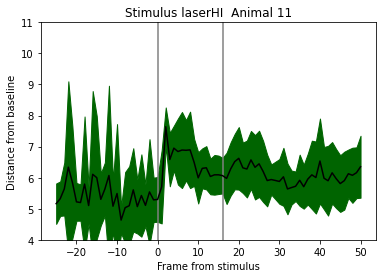

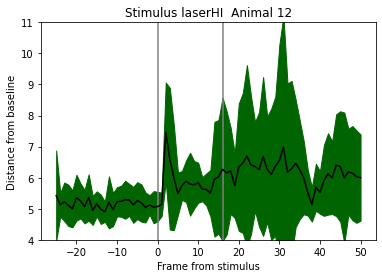

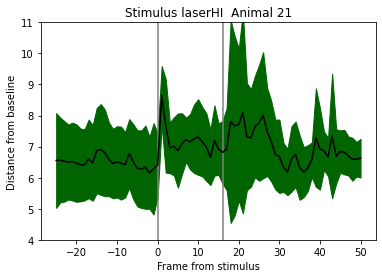

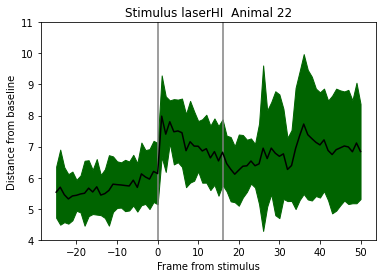

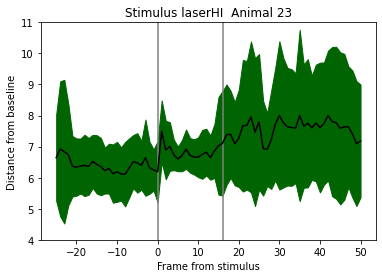

           0        1        2        3        4        5        6        7  \
-25  5.45388  6.12876      NaN  6.71586  5.55883  5.58818  5.71107  6.89401   
-24  5.44985  6.17833      NaN  7.68749  5.36419  5.83748  5.50327  6.23485   
-23  5.17528  6.21772      NaN  7.45279  5.42902  6.16902  5.74426  6.17672   
-22  4.93225  6.05254  7.01481  7.11973  5.25823  6.24096  5.70946  6.19522   
-21  5.17517  5.59233  6.29477  6.37632  5.19231  6.07037  5.88111  6.27104   
..       ...      ...      ...      ...      ...      ...      ...      ...   
 46  6.06396  7.63526  5.64607  7.22441  6.21995  6.81184  7.31538   5.9236   
 47   6.1705  6.85107  5.63984  7.44041  6.42566  6.88176  7.51282  6.50726   
 48  6.27734  6.51707  5.76815  7.16348  5.84838  6.59678  7.30943  6.53185   
 49   6.3544  6.91644  5.66923  6.99952  5.80891  6.65668  7.50411  6.09807   
 50  6.20992  7.55893  5.36391  6.66452   6.1103  6.53304  7.53577  6.16348   

           8        9  
-25  6.38884  5.09333  
-24

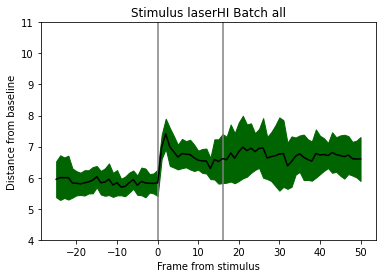

Stimulus  laserLO


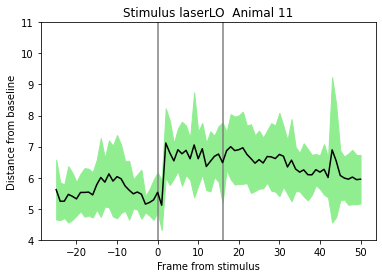

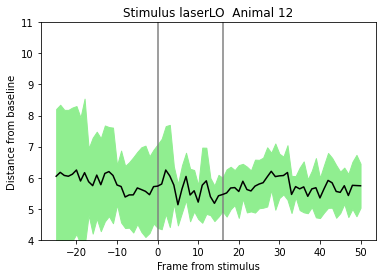

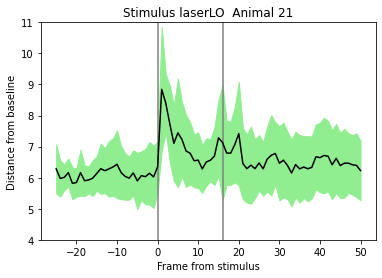

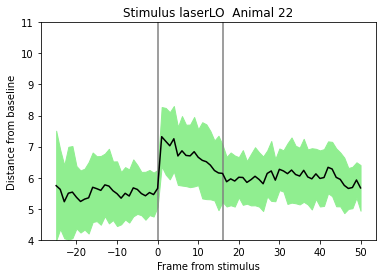

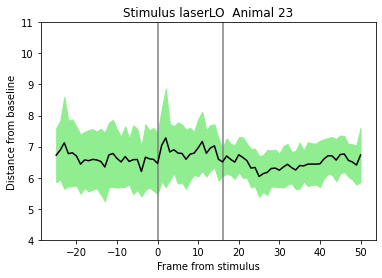

           0        1        2        3        4        5        6        7  \
-25  6.79938  4.93025  5.78076  6.17475  6.52982  5.89568  7.15424  5.81551   
-24  6.97757   4.7913  5.74358  6.29453  6.12417  6.05598  6.53277  5.38965   
-23  6.88457  4.79129  5.49272  6.03696  6.28211  5.74119  6.33988   5.4993   
-22    6.748  4.91189  5.52935  5.72584  6.65118  6.12887  6.81271  5.66194   
-21  6.74248  4.78986  5.58892  5.28143  6.32657  6.04281  7.27598  5.71157   
..       ...      ...      ...      ...      ...      ...      ...      ...   
 46  5.46316  6.02536  5.90085   6.2159  6.68486  6.40758  6.80708  5.74628   
 47  5.47566  6.13653   5.8254  6.03663  6.09636  5.93569  6.61222  5.66716   
 48  5.53578  6.20375  5.98033  6.04707  6.20368  5.88424  6.54789  5.78527   
 49  5.67082   5.6292  6.13877  6.26252  6.41603  5.75227  6.53245  5.58623   
 50  5.61815  5.95247  6.33358  6.04387  6.20419  5.62943  6.62685  5.75502   

           8        9  
-25  5.62135   6.1288  
-24

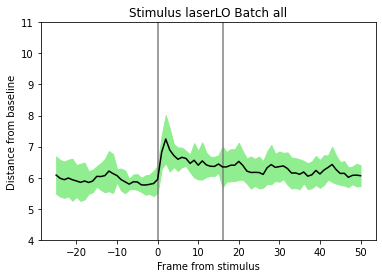

Stimulus  laserCTRL


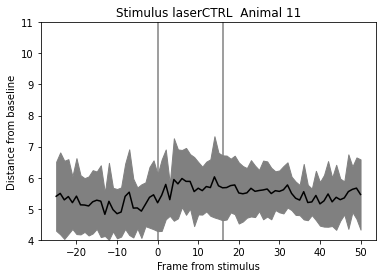

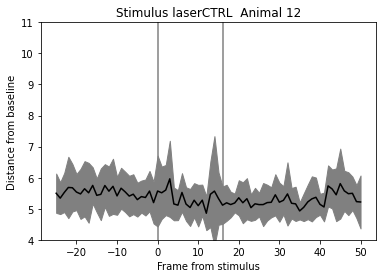

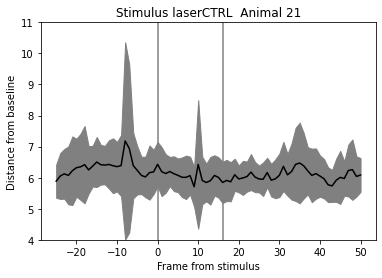

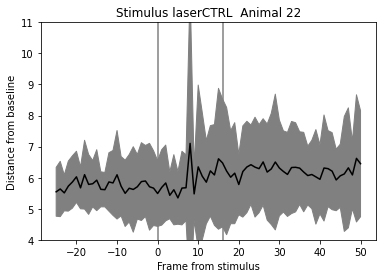

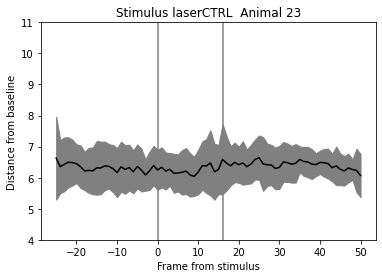

           0        1        2        3        4        5        6        7  \
-25  5.77264   5.7548  5.85944  5.28034  6.06514  5.67777  5.37314  5.80793   
-24  5.86818  5.68091  5.76419  5.47729  5.83916  5.41457  5.44564  6.21945   
-23  5.98184  5.83961  6.31269  5.53567  6.05483  5.57531  5.06567   5.4858   
-22  5.98495  5.55961  6.00272  5.76848  6.41744  6.09213  5.27359  5.63646   
-21  5.75631   5.4088  5.73098  6.37527  6.43091  5.48665  5.26519  5.73992   
..       ...      ...      ...      ...      ...      ...      ...      ...   
 46  5.46415  6.06301  5.99148  5.37072  5.61107  5.70999  6.22295   5.7724   
 47  6.12392  6.00078  6.00386  5.26704  5.58988  5.69289  6.23783  6.07889   
 48  5.89422  5.85309   6.0891  5.58072  6.04436  5.63768  6.09577  6.17009   
 49  6.13911  5.72772  5.83144  5.92159   6.0197  5.14947  5.89535  5.90337   
 50  5.81675  5.76968  5.81896  5.66071  5.68229  5.26164  5.76039  5.79078   

           8        9  
-25  6.04477  6.28626  
-24

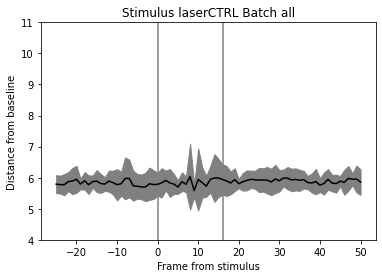

Stimulus  shock


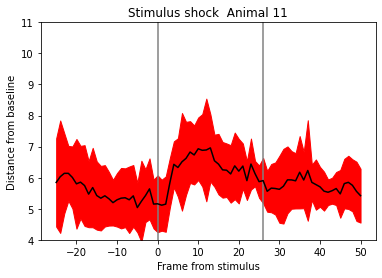

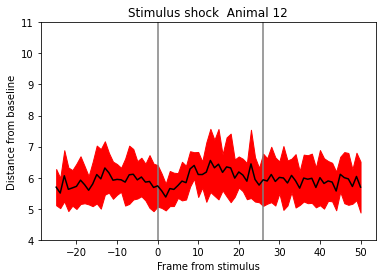

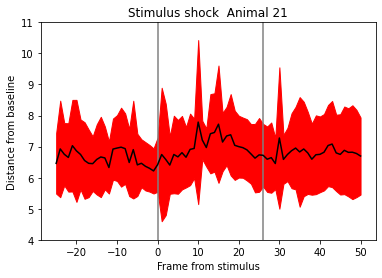

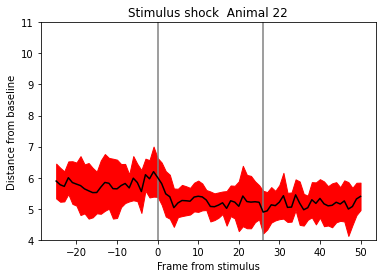

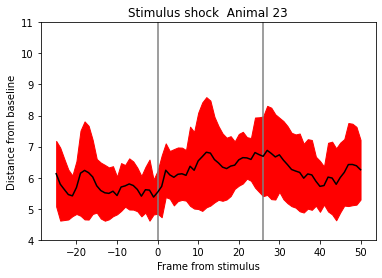

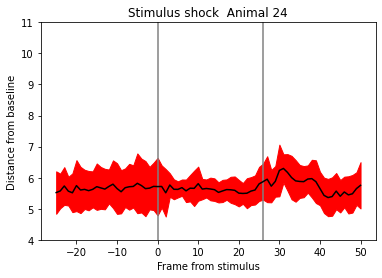

           0        1        2        3        4        5        6        7  \
-25  7.07125  6.29258      NaN  6.03686  5.77047   5.6282  5.63892  5.57114   
-24  6.92655  6.06429  6.36783  6.29771  5.94682  5.92332  5.53358  5.35553   
-23  6.72454   6.3044  6.12715  6.11872    6.113  5.89606   5.8542  5.60405   
-22  6.04645  6.52194  6.00021  5.73015  6.06023  5.86796  5.92644  5.61187   
-21  6.41904  6.16744  6.25011  5.65949  6.04683  5.63771  5.95455  5.76954   
..       ...      ...      ...      ...      ...      ...      ...      ...   
 46  6.29564  6.71754  5.90614  5.95168  5.36978  5.85029  6.02569  5.68231   
 47  6.10679  6.88858  5.96471  6.16479  5.39775  5.28549   5.8766  5.67799   
 48  5.71931  6.71683  5.96392  5.98619  5.41641  5.70586  5.89615  5.86226   
 49   6.0218  6.51695  5.98909  6.32673  5.36002  5.75635  6.29903  5.59874   
 50  5.48507  6.69525  6.02952  5.69936  5.33857  5.99604  6.17141  5.42752   

           8        9  
-25  5.66981  5.42652  
-24

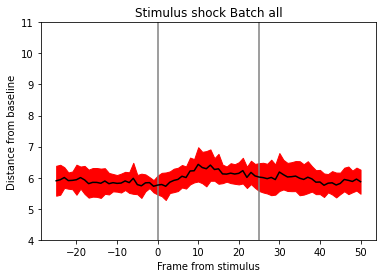

Stimulus  shockCTRL


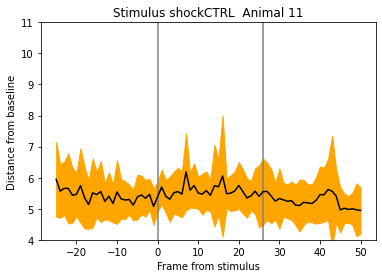

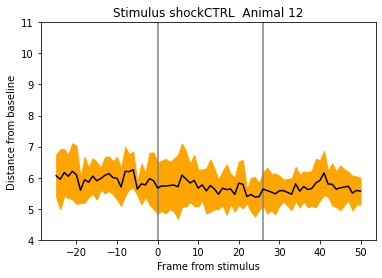

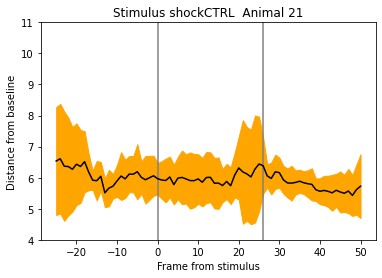

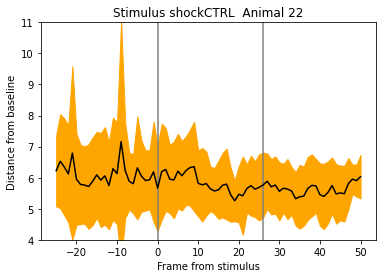

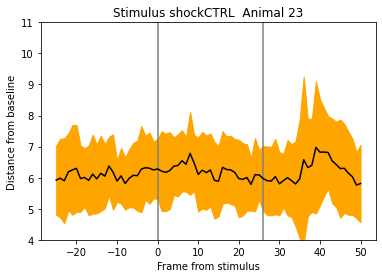

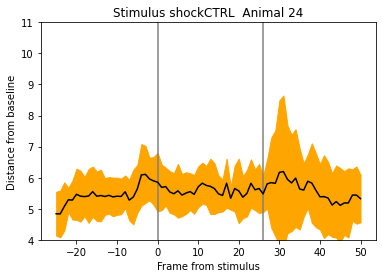

           0        1        2        3        4        5        6        7  \
-25  6.21853  5.78039  5.53099  5.79055  5.68885  6.02251  7.19081  5.41407   
-24  6.12944  5.71929  5.23705   6.3673  6.09645  6.06531  7.21448  4.98261   
-23   6.0182  5.62004  5.46709   6.3272  5.98505  5.96643  7.39205  5.09709   
-22  5.64415  5.72519  5.82542  6.34865  5.81386  6.34816  7.35489  5.07454   
-21  5.72136  5.88334  5.67612   5.8435  6.98106  6.31602  7.47759  4.96467   
..       ...      ...      ...      ...      ...      ...      ...      ...   
 46  5.84579   5.5395   5.2655  5.56226  5.27386  5.59605  6.24912   5.7162   
 47  5.84108  5.63222  5.16101  5.61184  5.39413  5.40275  6.28271  5.79806   
 48   6.0918   5.5223  4.92781  5.79466   5.3225  5.66599  5.98586  5.91061   
 49  5.77578  5.51267  5.02159  5.63712  5.25571  6.09201  5.89036  5.80064   
 50  5.49309  5.37571  5.03744  5.68368   5.7638  5.85532  5.86128  5.98044   

           8        9  
-25  5.95522  5.61496  
-24

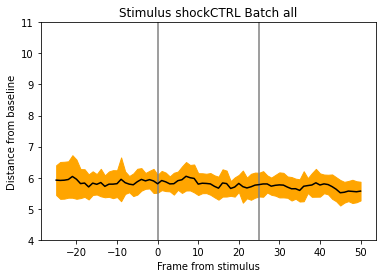

In [28]:
def distance_to_baseline_averaged_all_animals(batch):
    for stim in ["laserHI","laserLO","laserCTRL","shock","shockCTRL"]:
        print("Stimulus ", stim)
        if(str(batch) == "1"):
            mah1 = distance_to_baseline_averaged("1", "1",stim)
            mah2 = distance_to_baseline_averaged("1", "2",stim)
            mah = pd.DataFrame(index = mah1.index, columns = mah1.columns)
            mah = (mah1 + mah2) /2
            std = []
            for frame in range(-int(fps*5),int(fps*10)):
                listt = mah.loc[frame,:].tolist()
                listt = [x for x in listt if x >= 0]
                std.append(np.std(np.array(listt)))
            diff = []
            summ = []
            avg = mah.mean(axis = 1).tolist()
            for frame in range(0,int(fps*10)+int(fps*5)):
                diff.append(avg[frame]-std[frame])
                summ.append(avg[frame]+std[frame])

            plt.title("Stimulus " + str(stim) + " Batch " + batch)
            plt.xlabel('Frame from stimulus')
            plt.ylabel("Distance from baseline")
            plt.ylim(4,11)
            plt.axvline(0, c = 'gray')
            if(stim in ["laserHI","laserLO","laserCTRL"]):
                plt.axvline(int(fps*3.1),c = 'gray')
            else:
                plt.axvline(int(fps*5),c = 'gray')
            plt.plot(range(-int(fps*5),int(fps*10)), avg, color = "black")
            plt.fill_between(range(-int(fps*5),int(fps*10)), diff, summ, color = colors.get(stim))
            plt.show()
        elif(str(batch) == "2"):
            mah1 = distance_to_baseline_averaged("2", "1",stim)
            mah2 = distance_to_baseline_averaged("2", "2",stim)
            mah3 = distance_to_baseline_averaged("2", "3",stim)
            mah4 = distance_to_baseline_averaged("2", "4",stim)
            mah = pd.DataFrame(index = mah1.index, columns = mah1.columns)
            if(stim in ["laserHI","laserLO","laserCTRL"]):
                mah = (mah1 + mah2 + mah3)/3
            else:
                mah = (mah1 + mah2 + mah3 + mah4)/4
            std = []
            for frame in range(-int(fps*5),int(fps*10)):
                listt = mah.loc[frame,:].tolist()
                listt = [x for x in listt if x >= 0]
                std.append(np.std(np.array(listt)))
            diff = []
            summ = []
            avg = mah.mean(axis = 1).tolist()
            for frame in range(0,int(fps*10)+int(fps*5)):
                diff.append(avg[frame]-std[frame])
                summ.append(avg[frame]+std[frame])

            plt.title("Stimulus " + str(stim) + " Batch " + batch)
            plt.xlabel('Frame from stimulus')
            plt.ylabel("Distance from baseline")
            plt.ylim(4,11)
            plt.axvline(0, c = 'gray')
            if(stim in ["laserHI","laserLO","laserCTRL"]):
                plt.axvline(int(fps*3.1),c = 'gray')
            else:
                plt.axvline(int(fps*5),c = 'gray')
            plt.plot(range(-int(fps*5),int(fps*10)), avg, color = "black")
            plt.fill_between(range(-int(fps*5),int(fps*10)), diff, summ, color = colors.get(stim))
            plt.show()
        elif(str(batch) == "all"):
            mah1 = distance_to_baseline_averaged("1", "1",stim)
            mah2 = distance_to_baseline_averaged("1", "2",stim)
            mah = pd.DataFrame(index = mah1.index, columns = mah1.columns)
            mah21 = distance_to_baseline_averaged("2", "1",stim)
            mah22 = distance_to_baseline_averaged("2", "2",stim)
            mah23 = distance_to_baseline_averaged("2", "3",stim)
            mah24 = distance_to_baseline_averaged("2", "4",stim)
            if(stim in ["laserHI","laserLO","laserCTRL"]):
                mah = (mah1 + mah2 + mah21 + mah22 + mah23)/5
            else:
                mah = (mah1 + mah2 + mah21 + mah22 + mah23 + mah24)/6
            std = []
            print(mah)
            for frame in range(-int(fps*5),int(fps*10)):
                listt = mah.loc[frame,:].tolist()
                listt = [x for x in listt if x >= 0]
                std.append(np.std(np.array(listt)))
            diff = []
            summ = []
            avg = mah.mean(axis = 1).tolist()
            for frame in range(0,int(fps*10)+int(fps*5)):
                diff.append(avg[frame]-std[frame])
                summ.append(avg[frame]+std[frame])

            plt.title("Stimulus " + str(stim) + " Batch " + batch)
            plt.xlabel('Frame from stimulus')
            plt.ylabel("Distance from baseline")
            plt.ylim(4,11)
            plt.axvline(0, c = 'gray')
            if(stim in ["laserHI","laserLO","laserCTRL"]):
                plt.axvline(int(fps*3.1),c = 'gray')
            else:
                plt.axvline(int(fps*5),c = 'gray')
            plt.plot(range(-int(fps*5),int(fps*10)), avg, color = "black")
            plt.fill_between(range(-int(fps*5),int(fps*10)), diff, summ, color = colors.get(stim))
            plt.show()
        
distance_to_baseline_averaged_all_animals("all")

Stimulus  laserHI


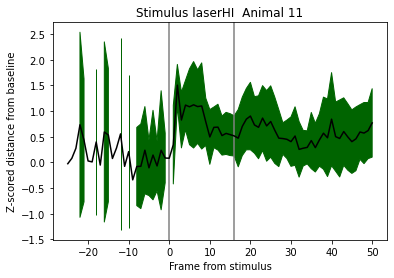

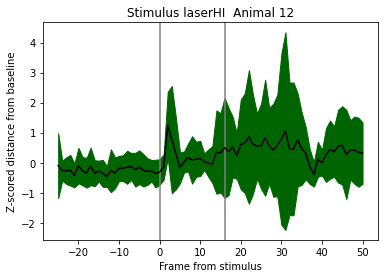

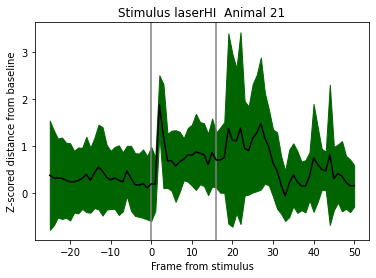

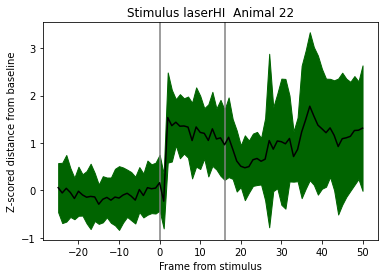

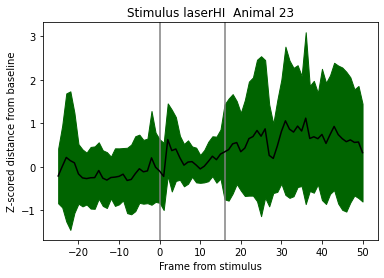

            0         1         2         3         4
-25 -0.025412 -0.098439  0.376951  0.057212 -0.207827
-24  0.080581 -0.265349  0.322131 -0.054520  0.010190
-23  0.275608 -0.266532  0.318922  0.043087  0.218246
-22  0.733782 -0.253489  0.314075 -0.044699  0.144896
-21  0.430654 -0.424303  0.271876 -0.171785  0.094664
..        ...       ...       ...       ...       ...
 46  0.459484  0.273937  0.414918  1.108852  0.580705
 47  0.593145  0.424471  0.358450  1.139524  0.621945
 48  0.572161  0.417221  0.226699  1.262421  0.563476
 49  0.620549  0.346470  0.153491  1.268218  0.572807
 50  0.769809  0.318755  0.153460  1.312860  0.328468

[76 rows x 5 columns]


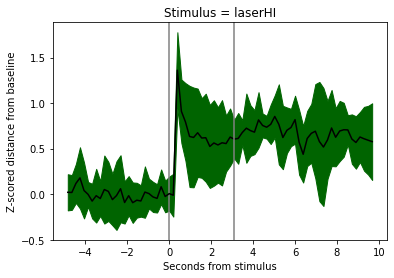

Stimulus  laserLO


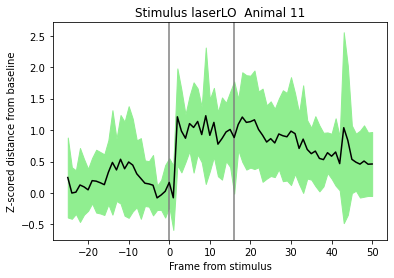

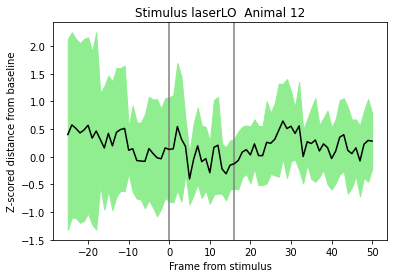

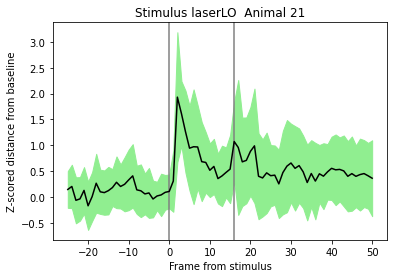

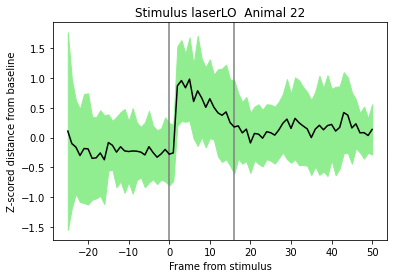

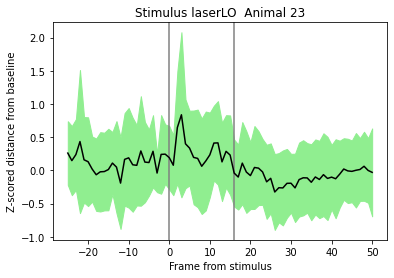

            0         1         2         3         4
-25  0.245969  0.399494  0.145937  0.108691  0.261410
-24 -0.000398  0.574181  0.203946 -0.101881  0.147644
-23  0.013417  0.511276 -0.063542 -0.159796  0.239421
-22  0.127450  0.429270 -0.036298 -0.300947  0.434830
-21  0.097610  0.482883  0.127754 -0.183942  0.160368
..        ...       ...       ...       ...       ...
 46  0.489986  0.160505  0.399689  0.230728  0.002586
 47  0.459209 -0.075989  0.433583  0.079755  0.014373
 48  0.508050  0.226563  0.453035  0.082407  0.062907
 49  0.457660  0.293451  0.410179  0.034551  0.000371
 50  0.461173  0.281729  0.363292  0.136409 -0.029129

[76 rows x 5 columns]


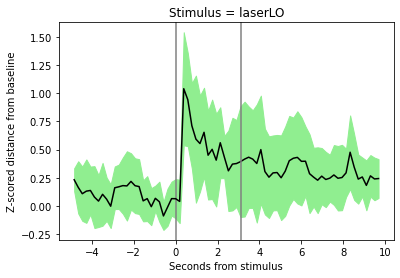

Stimulus  laserCTRL


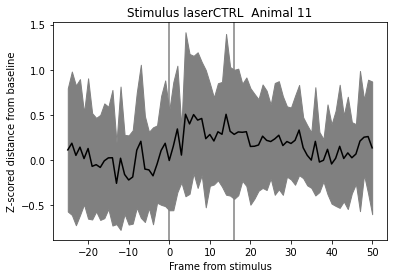

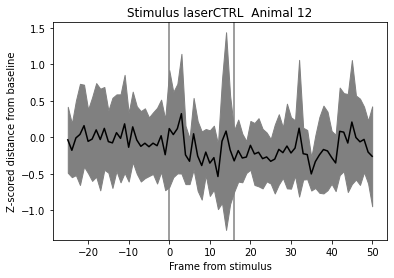

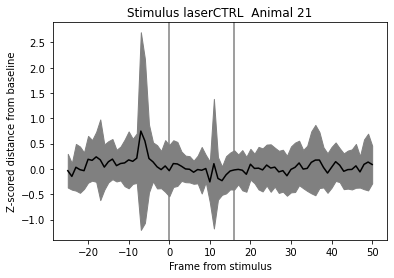

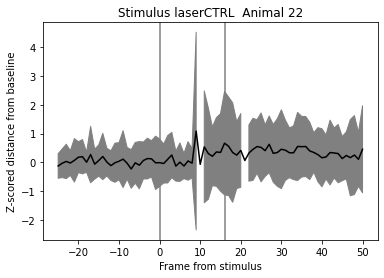

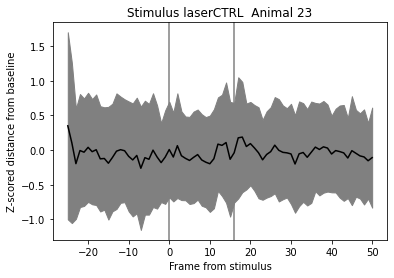

            0         1         2         3         4
-25  0.113354 -0.034153 -0.033947 -0.123554  0.350978
-24  0.187128 -0.178161 -0.146290 -0.029779  0.104153
-23  0.052766 -0.008497  0.033795  0.033718 -0.195393
-22  0.143691  0.039481 -0.013823 -0.022571 -0.006112
-21  0.017576  0.159499 -0.033589  0.071030 -0.029983
..        ...       ...       ...       ...       ...
 46  0.067933 -0.002816  0.061710  0.238751 -0.045747
 47  0.211330 -0.061765 -0.057496  0.164445 -0.083359
 48  0.254110 -0.029006  0.091490  0.253838 -0.098363
 49  0.261149 -0.202530  0.136967  0.106218 -0.153456
 50  0.136095 -0.260693  0.088528  0.454299 -0.108354

[76 rows x 5 columns]


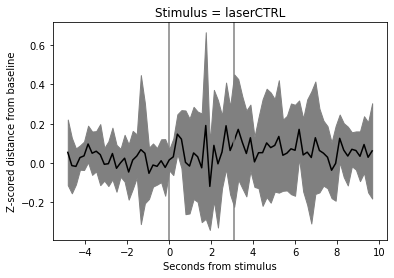

Stimulus  shock


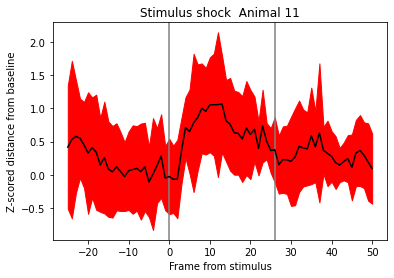

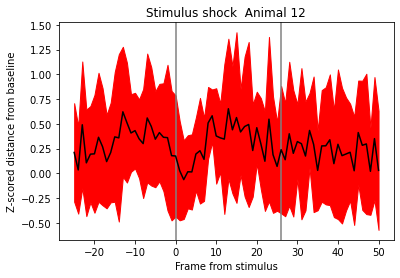

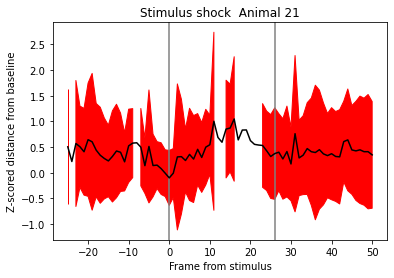

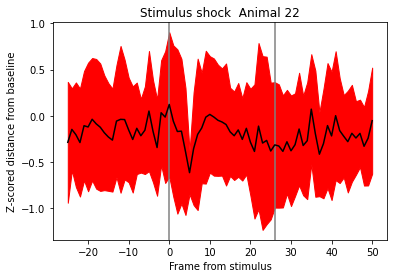

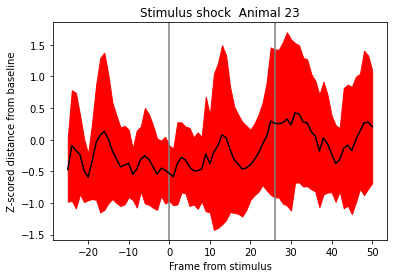

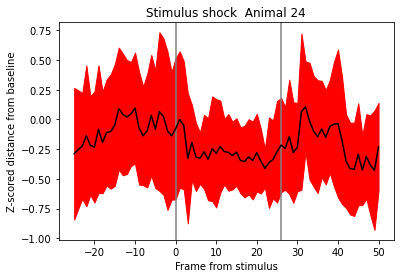

            0         1         2         3         4         5
-25  0.417744  0.210366  0.505283 -0.288509 -0.471761 -0.288597
-24  0.530509  0.033683  0.219159 -0.148519 -0.091085 -0.253442
-23  0.578675  0.490153  0.570003 -0.206095 -0.172770 -0.223279
-22  0.551216  0.105326  0.506025 -0.290905 -0.232820 -0.138124
-21  0.449944  0.193111  0.408754 -0.108557 -0.484670 -0.219389
..        ...       ...       ...       ...       ...       ...
 46  0.329529  0.282525  0.426070 -0.241649  0.006189 -0.425179
 47  0.366339  0.296605  0.446663 -0.191593  0.132116 -0.311151
 48  0.294834  0.019805  0.410408 -0.331389  0.266320 -0.386190
 49  0.194637  0.350251  0.410574 -0.244054  0.277016 -0.427149
 50  0.094396  0.029281  0.348185 -0.054150  0.207077 -0.230143

[76 rows x 6 columns]


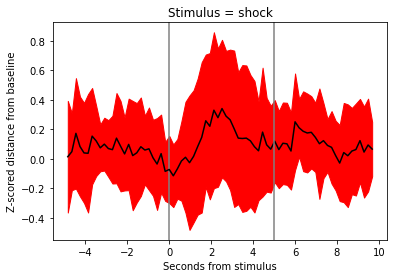

Stimulus  shockCTRL


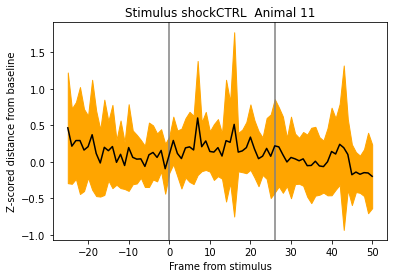

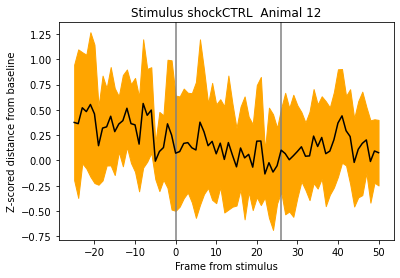

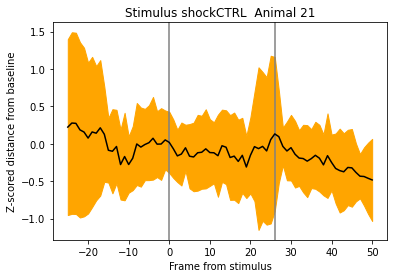

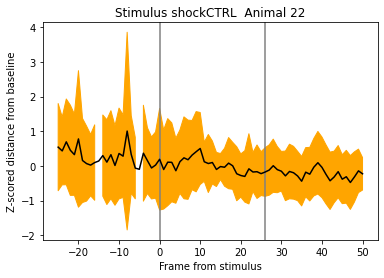

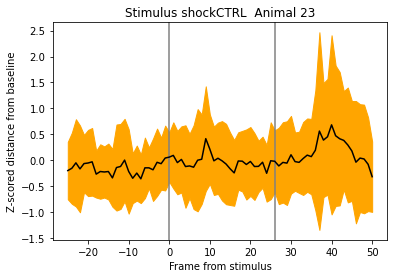

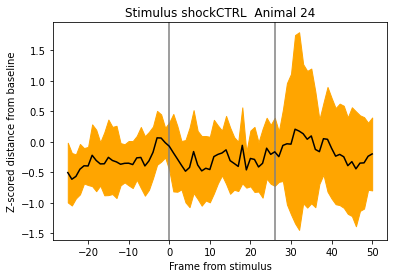

            0         1         2         3         4         5
-25  0.465894  0.375514  0.222434  0.541036 -0.199943 -0.504063
-24  0.215164  0.363518  0.276759  0.432586 -0.155116 -0.613093
-23  0.291778  0.520595  0.272715  0.693615 -0.050744 -0.566883
-22  0.292120  0.482893  0.185519  0.450856 -0.167089 -0.447903
-21  0.161911  0.553293  0.156259  0.324096 -0.064517 -0.392571
..        ...       ...       ...       ...       ...       ...
 46 -0.139302  0.168434 -0.382855 -0.313246 -0.037744 -0.442528
 47 -0.169438  0.202664 -0.433840 -0.478403  0.041189 -0.348679
 48 -0.147415 -0.010819 -0.437871 -0.318745  0.024240 -0.344614
 49 -0.151904  0.093089 -0.461744 -0.143150 -0.077972 -0.236464
 50 -0.197642  0.076294 -0.483753 -0.228015 -0.317738 -0.198402

[76 rows x 6 columns]


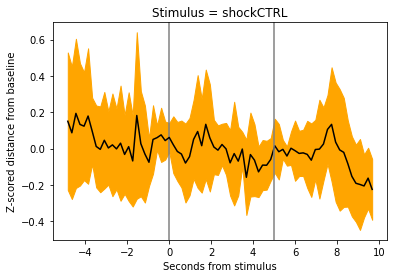

In [102]:
def distance_to_baseline_averaged_all_animals_std(batch):
    for stim in ["laserHI","laserLO","laserCTRL","shock","shockCTRL"]: #squeak,squeakCTRL
        print("Stimulus ", stim)
        if(str(batch) == "all"):
            mah1 = distance_to_baseline_averaged("1", "1",stim)
            mah2 = distance_to_baseline_averaged("1", "2",stim)
            mah21 = distance_to_baseline_averaged("2", "1",stim)
            mah22 = distance_to_baseline_averaged("2", "2",stim)
            mah23 = distance_to_baseline_averaged("2", "3",stim)
            mah24 = distance_to_baseline_averaged("2", "4",stim)
            mah_avg1 = pd.DataFrame(mah1.mean(axis = 1))
            mah_avg2 = pd.DataFrame(mah2.mean(axis = 1))
            mah_avg21 = pd.DataFrame(mah21.mean(axis = 1))
            mah_avg22 = pd.DataFrame(mah22.mean(axis = 1))
            mah_avg23 = pd.DataFrame(mah23.mean(axis = 1))
            mah_avg24 = pd.DataFrame(mah24.mean(axis = 1))
            mah = pd.concat([mah_avg1,mah_avg2,mah_avg21,mah_avg22,mah_avg23], axis = 1, ignore_index = True)
            if(stim not in ["laserHI","laserLO","laserCTRL"]):
                mah = pd.concat([mah,mah_avg24], axis = 1, ignore_index = True)
            print(mah) 
            
            std = []
            for frame in range(-int(fps*5),int(fps*10)):
                listt = mah.loc[frame,:].tolist()
                std.append(np.std(np.array(listt)))
            diff = []
            summ = []
            avg = mah.mean(axis = 1).tolist()
            for frame in range(0,int(fps*10)+int(fps*5)):
                diff.append(avg[frame]-std[frame])
                summ.append(avg[frame]+std[frame])

            plt.title("Stimulus = " + str(stim))
            plt.xlabel('Seconds from stimulus')
            plt.ylabel("Z-scored distance from baseline")
            plt.axvline(0, c = 'gray')
            #if(stim in ["laserHI","laserLO","laserCTRL"]):
            #    plt.axvline(int(3.1),c = 'gray')
            #else:
            #    plt.axvline(int(5),c = 'gray')
            listtt = list(range(-25,51))
            listtt = [x/fps for x in listtt]
            plt.plot(listtt, avg, color = "black")
            plt.fill_between(listtt, diff, summ, color = colors.get(stim))
            if(stim in ["laserHI","laserLO","laserCTRL"]):
                plt.axvline(3.1,c = 'gray')
            else:
                plt.axvline(5,c = 'gray')
            plt.savefig('presentation_averaged_distance' + str(stim) + '.eps', format='eps')
            plt.show()
        
distance_to_baseline_averaged_all_animals_std("all")

   shock  shockCTRL
0   1068        896
1   1601       1383
2   1949       1783
3   2472       2167
4   6009       2908
5   3188       3504
6   3980       3675
7   4514       4214
8   4939       4716
9   5183       5359


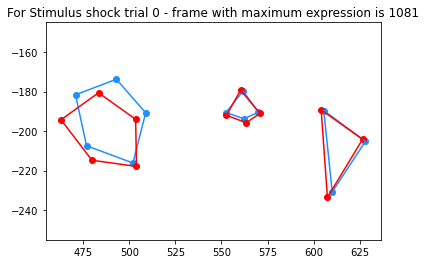

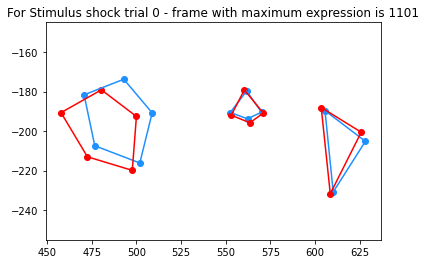

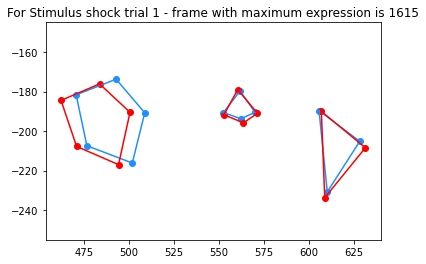

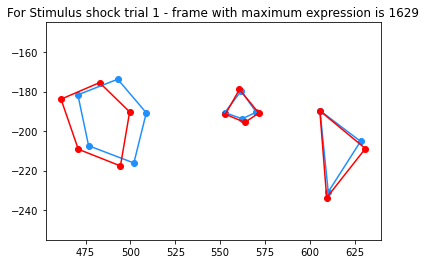

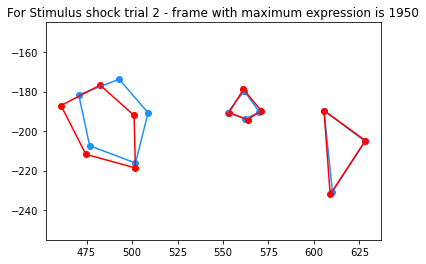

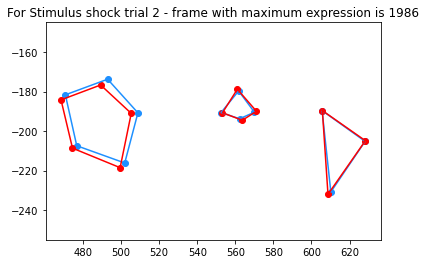

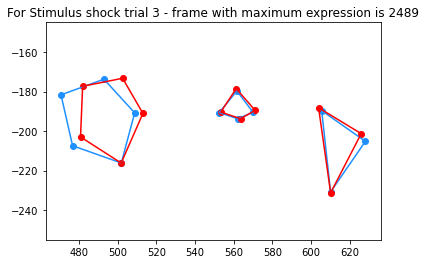

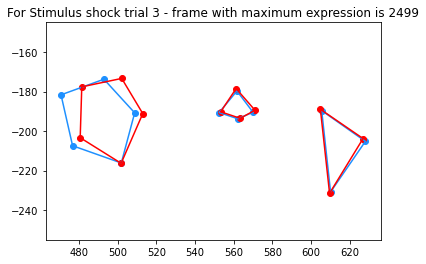

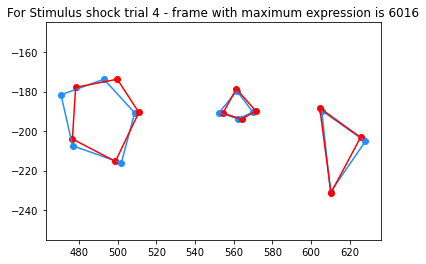

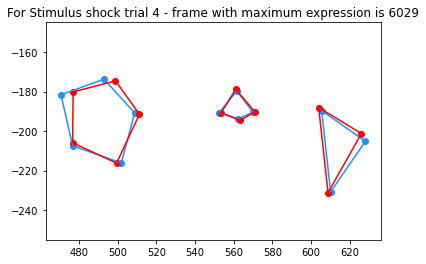

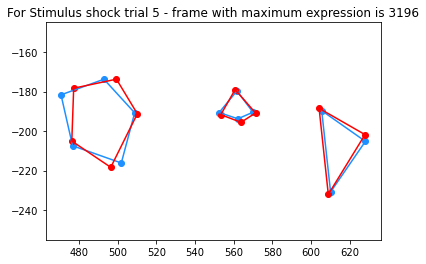

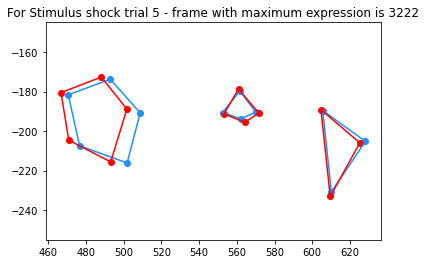

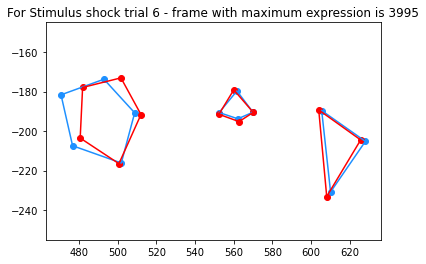

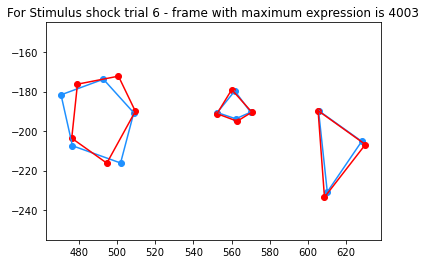

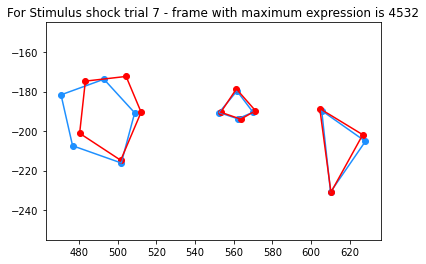

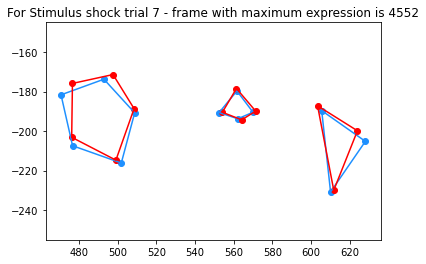

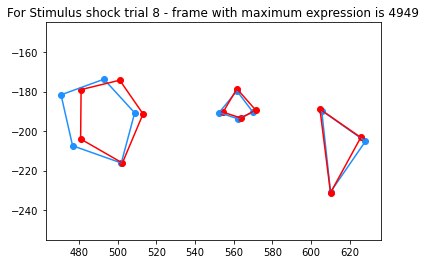

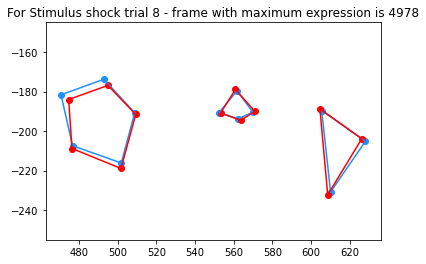

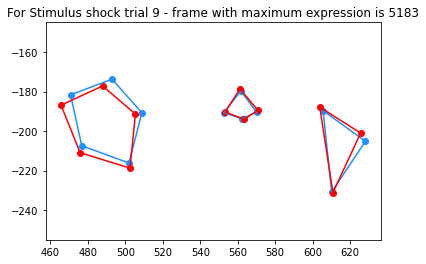

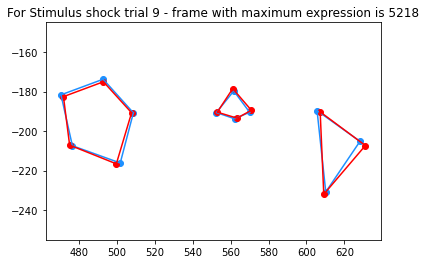

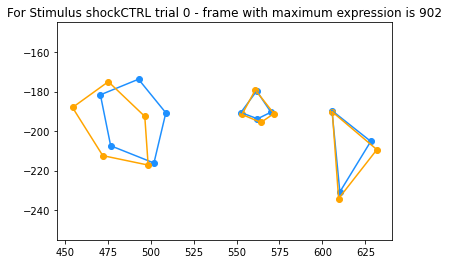

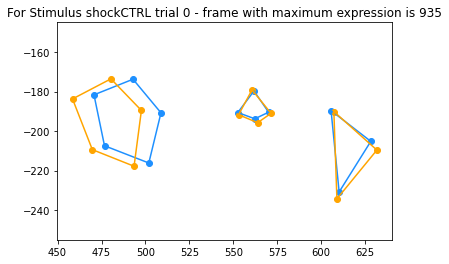

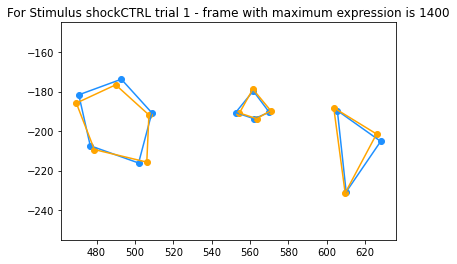

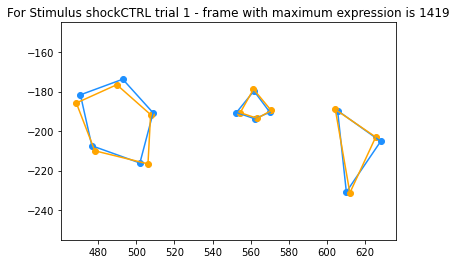

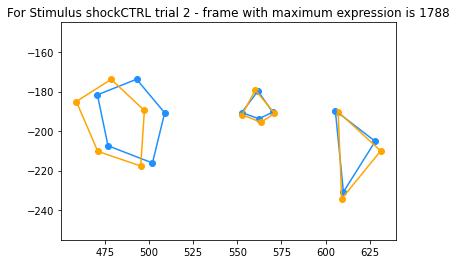

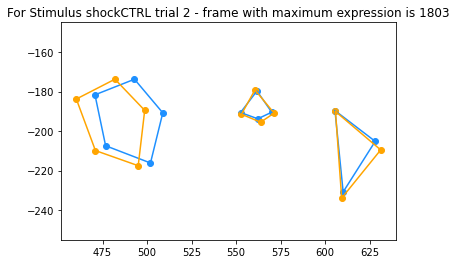

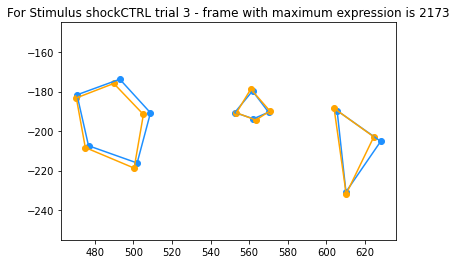

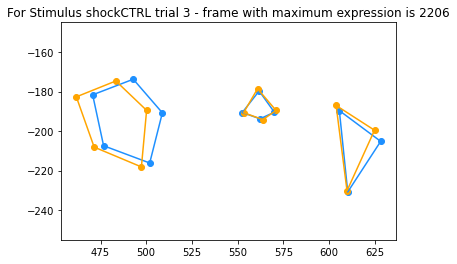

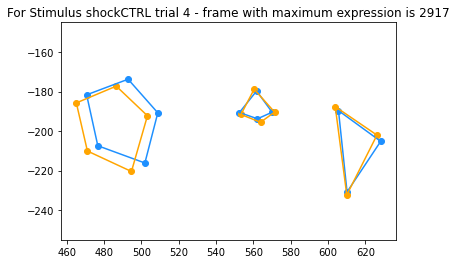

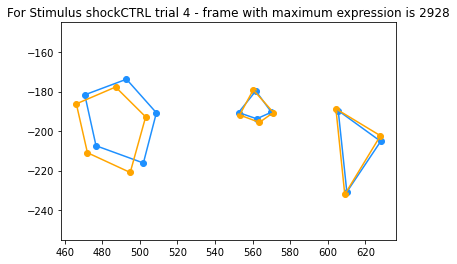

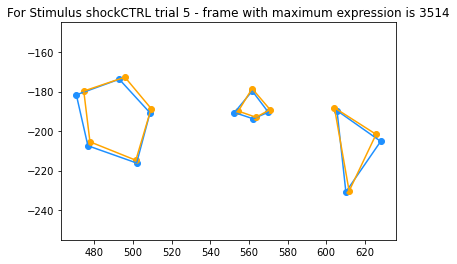

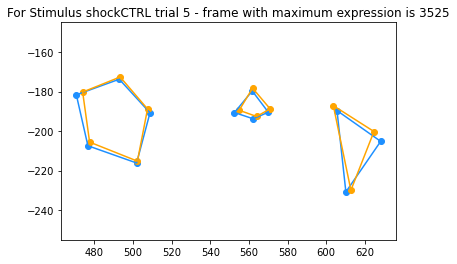

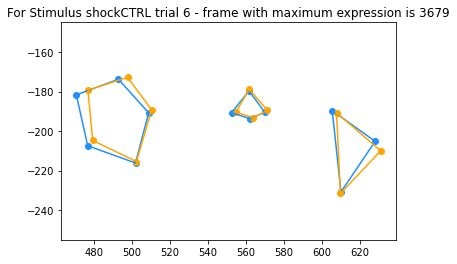

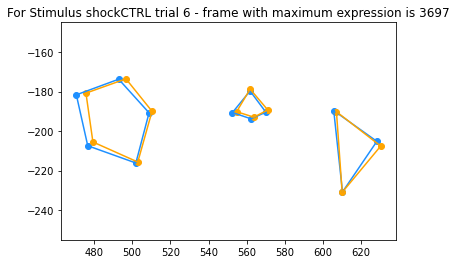

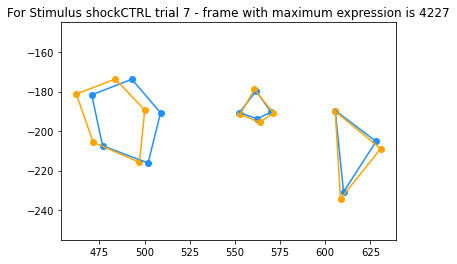

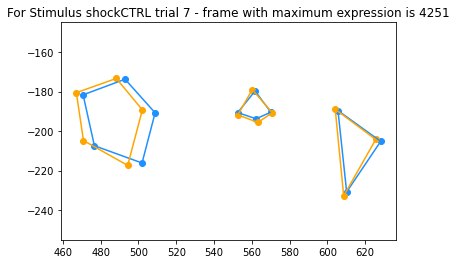

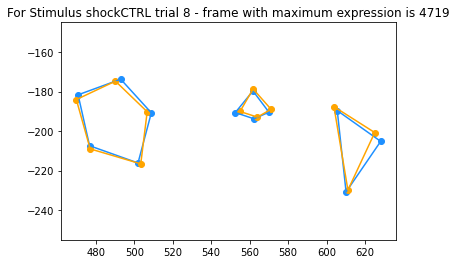

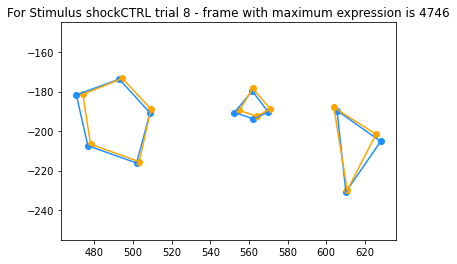

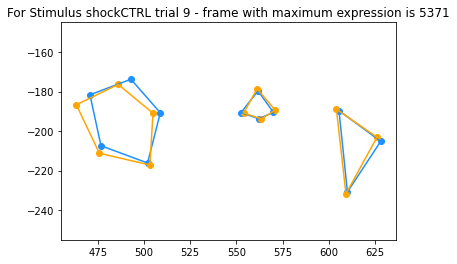

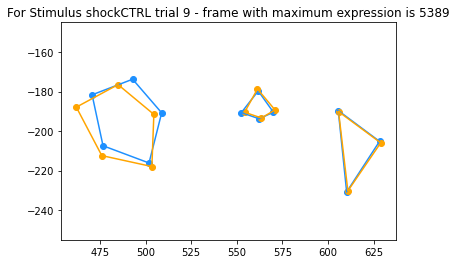

Frame of Maximum Expression
  shock shockCTRL
0  1081       902
1  1615      1400
2  1950      1788
3  2489      2173
4  6016      2917
5  3196      3514
6  3995      3679
7  4532      4227
8  4949      4719
9  5183      5371
  shock shockCTRL
0  1101       935
1  1629      1419
2  1986      1803
3  2499      2206
4  6029      2928
5  3222      3525
6  4003      3697
7  4552      4251
8  4978      4746
9  5218      5389


In [8]:
#Function plotting maximal Mahalanobis facial expression vs fixed baseline
def mahalanobis_maximal_shock_two_intervals(batch, animall):
    df = pd.read_csv("Batch" + str(batch) + "/OutputAnimal" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_start = pd.read_csv("Batch" + str(batch) + "/list_start" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_end = pd.read_csv("Batch" + str(batch) + "/list_end" + str(batch) + str(animall) + ".csv", index_col = 0)
    my_baseline = pd.read_csv("Batch" + str(batch) + "/BaselineExpression" + str(batch) + str(animall) + ".csv", index_col = 0)
    
    #covariance matrix for Mahalanobis distance
    copy_df = pd.DataFrame.copy(df, deep = True)
    copy_df = copy_df.dropna()
    cov = np.cov(copy_df.values.T)
    inv_cov = np.linalg.inv(cov)
    
    list_start = list_start.drop(columns = ["laserHI","laserLO","laserCTRL","squeak","squeakCTRL"])
    print(list_start)
    max_expression = pd.DataFrame(index = list_start.index, columns = list_start.columns)
    max_expression2 = pd.DataFrame(index = list_start.index, columns = list_start.columns)
    for y in list_start.columns:
        for z in list_start.index:
            maxx = 0
            flag = 0
            for frame in range(int(list_start.at[z,y]),int(list_start.at[z,y])+20):
                summ = distance.mahalanobis(df.loc[frame].to_numpy(), my_baseline.loc[0].to_numpy(), inv_cov)
                if(summ > maxx):
                    maxx = summ
                    flag = frame
            max_expression.at[z,y] = flag
            #print(distance.mahalanobis(df.loc[flag].to_numpy(), my_baseline.loc[0].to_numpy(), inv_cov))
            plt.title("For Stimulus " + str(y)+" trial "+str(z) + " - frame with maximum expression is " + str(flag))
            plot(my_baseline, 0, 'dodgerblue', batch)
            plot(df, flag, colors.get(y), batch)
            plt.show()
            
            maxx = 0
            flag = 0
            for frame in range(int(list_start.at[z,y])+20,int(list_start.at[z,y])+40):
                summ = distance.mahalanobis(df.loc[frame].to_numpy(), my_baseline.loc[0].to_numpy(), inv_cov)
                if(summ > maxx):
                    maxx = summ
                    flag = frame
            max_expression2.at[z,y] = flag
            #print(distance.mahalanobis(df.loc[flag].to_numpy(), my_baseline.loc[0].to_numpy(), inv_cov))
            plt.title("For Stimulus " + str(y)+" trial "+str(z) + " - frame with maximum expression is " + str(flag))
            plot(my_baseline, 0, 'dodgerblue', batch)
            plot(df, flag, colors.get(y), batch)
            plt.show()
    print("Frame of Maximum Expression")
    print(max_expression)
    print(max_expression2)
    max_expression.to_csv("Batch" + str(batch) + "/shock1_Frames_Maximal_Expressions_Animal" + str(batch) + str(animall) + ".csv")
    max_expression2.to_csv("Batch" + str(batch) + "/shock2_Frames_Maximal_Expressions_Animal" + str(batch) + str(animall) + ".csv")
    
    
mahalanobis_maximal_shock_two_intervals(batch = "1", animall = "2")

   laserHI  laserLO  laserCTRL
0    12915    12618      13272
1    14241    13583      13914
2    14711    14458      15043
3    15609    15326      15866
4    16151    16819      16427
5    17745    17461      17156
6    18406    18623      18116
7    19562    18967      19251
8    19854    20237      20527
9    20790    21322      21647


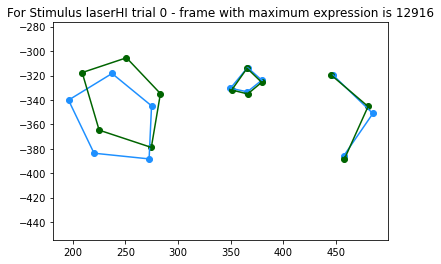

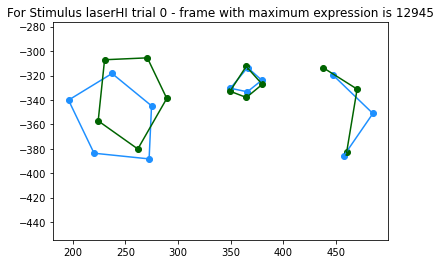

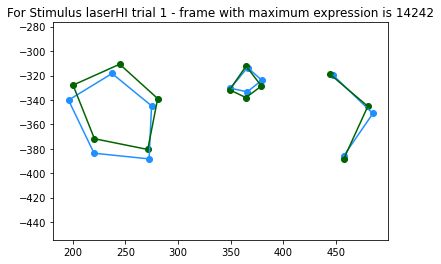

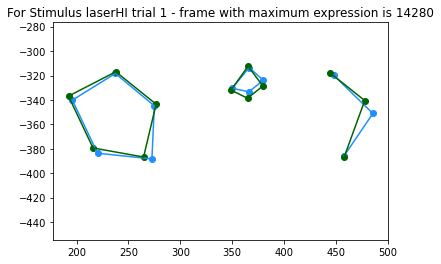

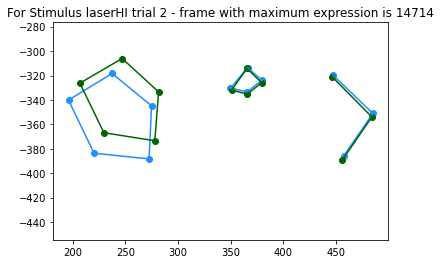

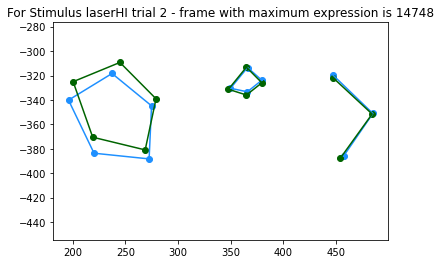

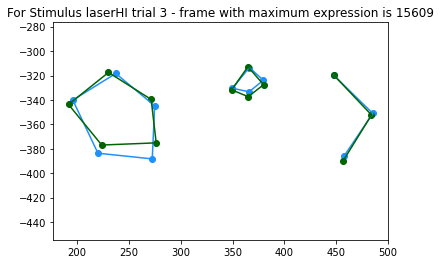

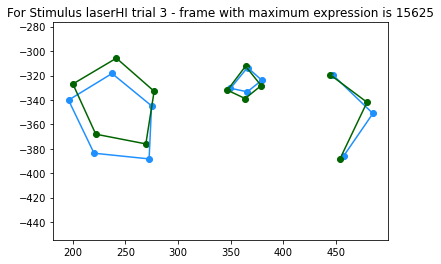

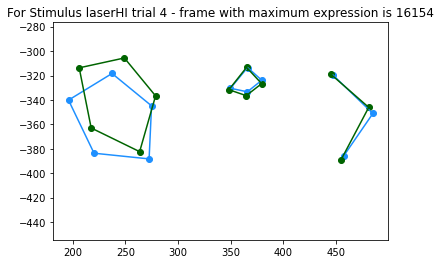

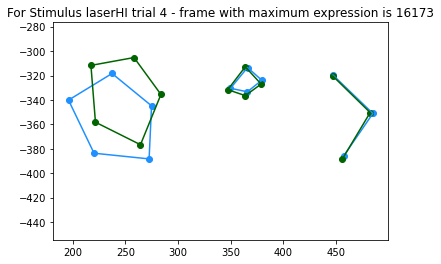

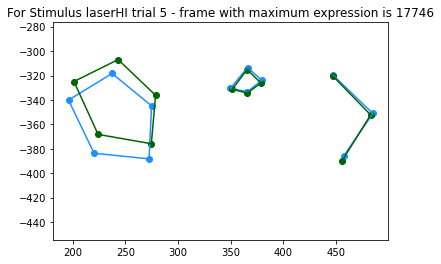

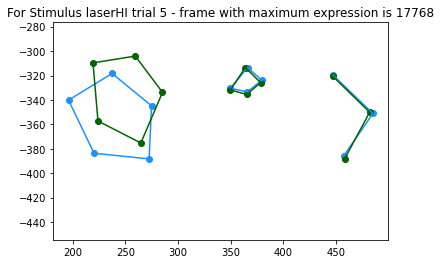

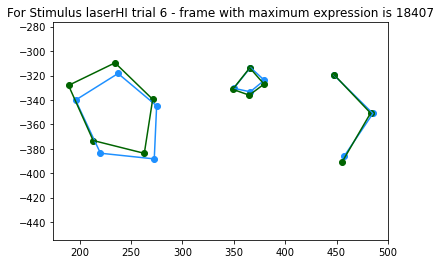

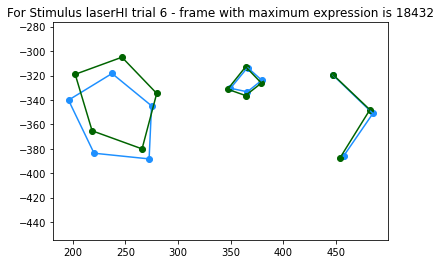

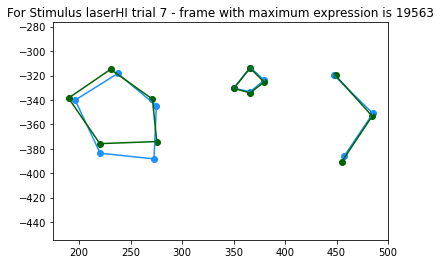

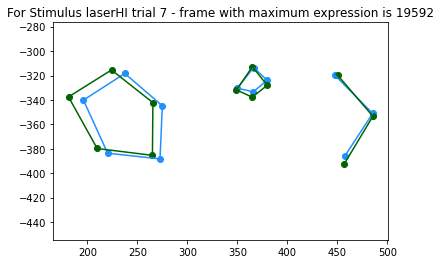

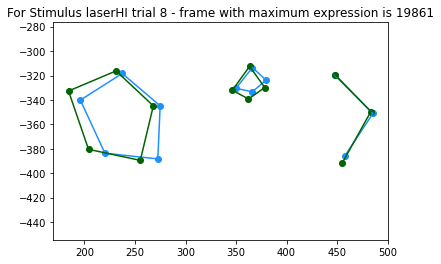

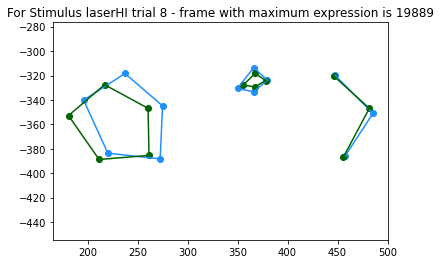

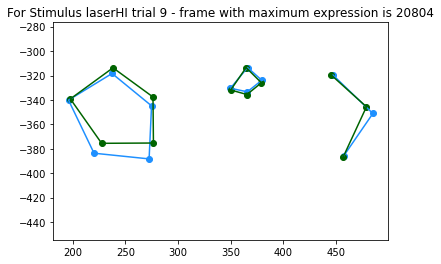

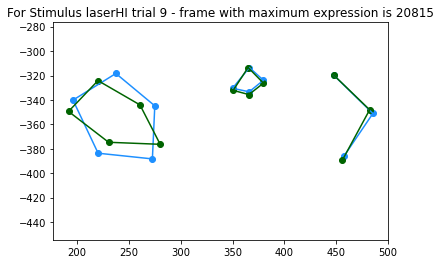

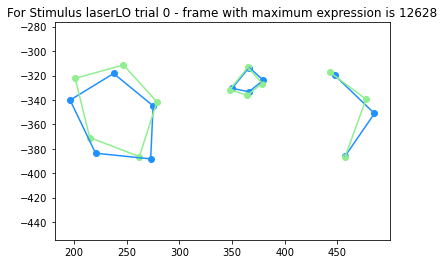

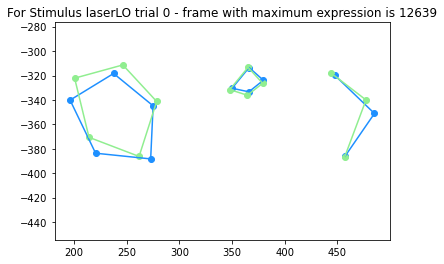

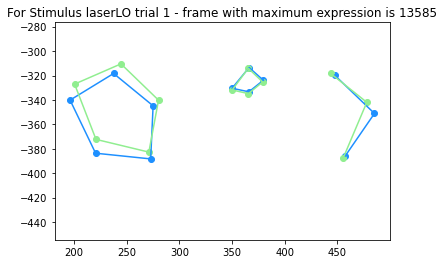

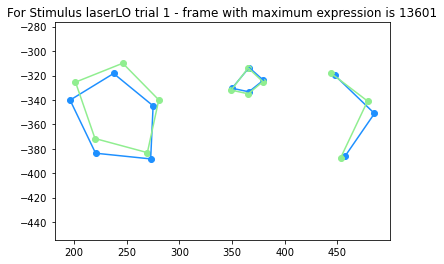

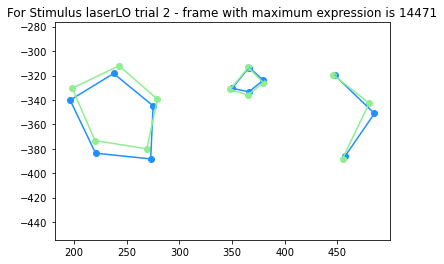

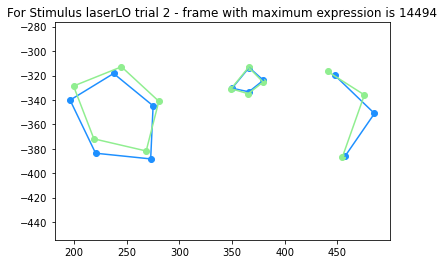

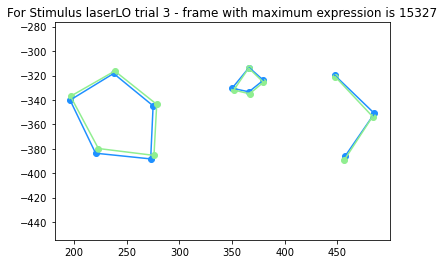

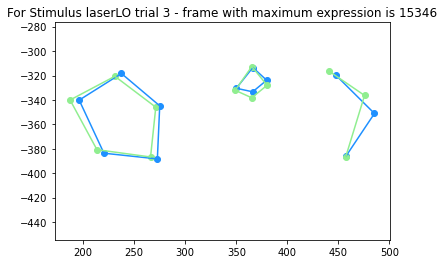

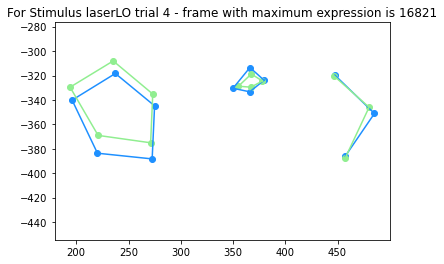

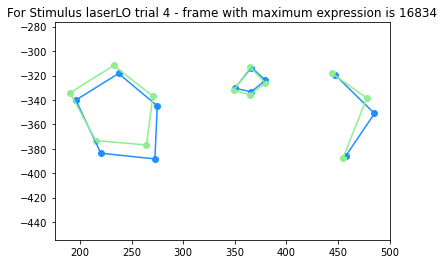

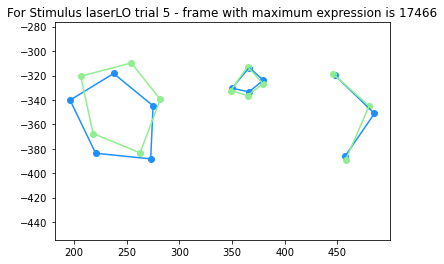

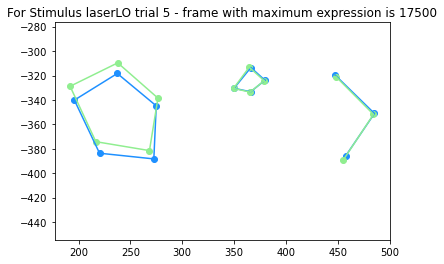

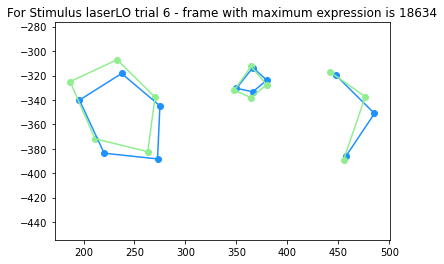

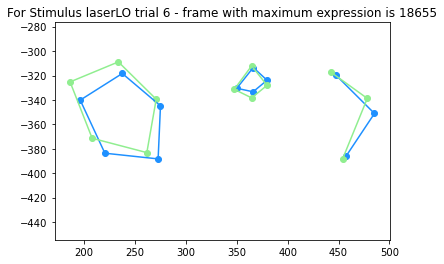

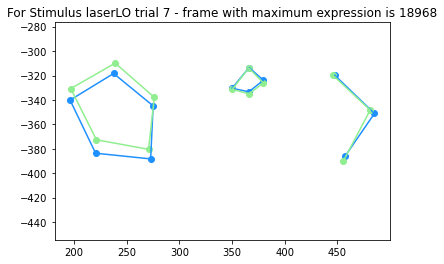

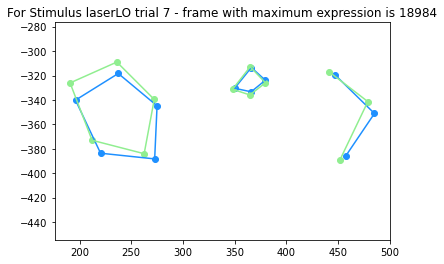

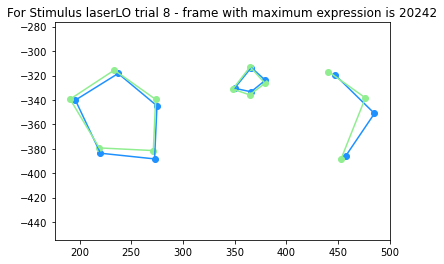

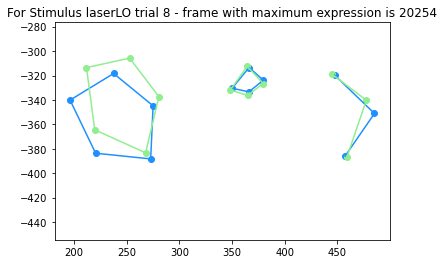

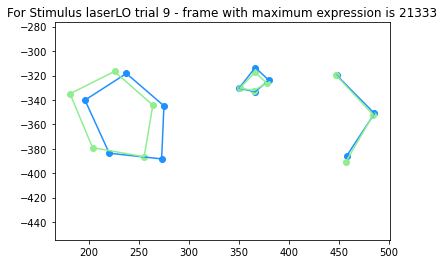

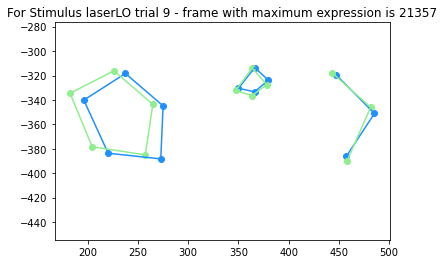

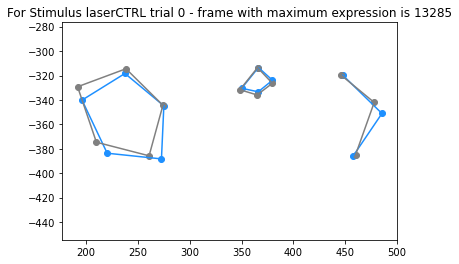

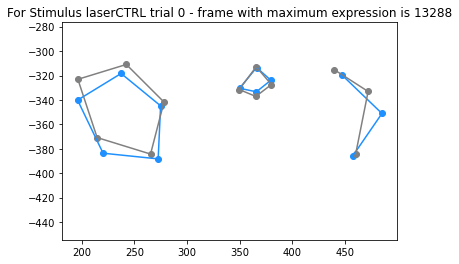

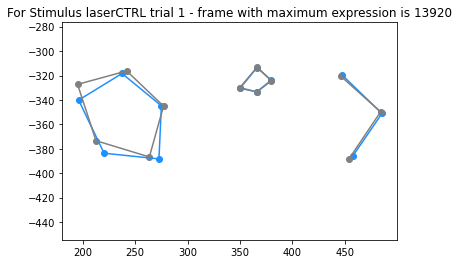

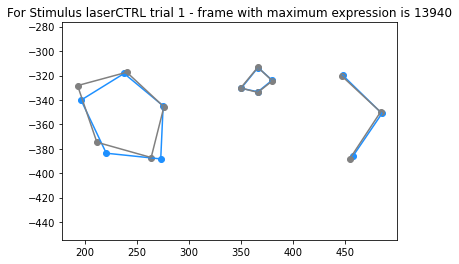

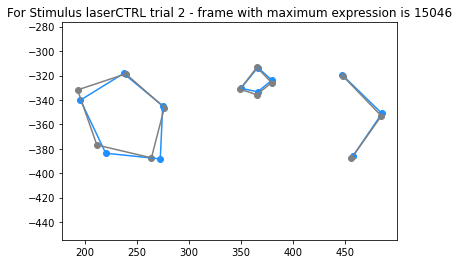

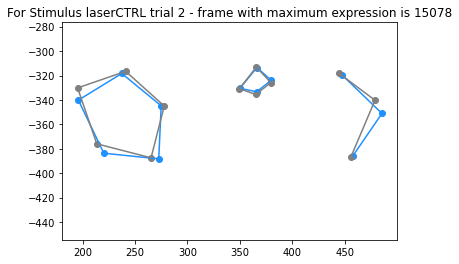

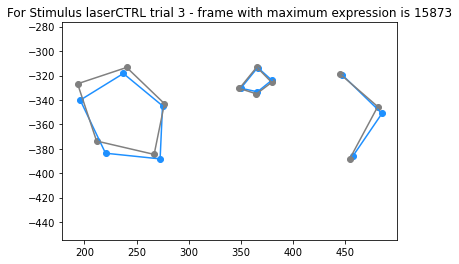

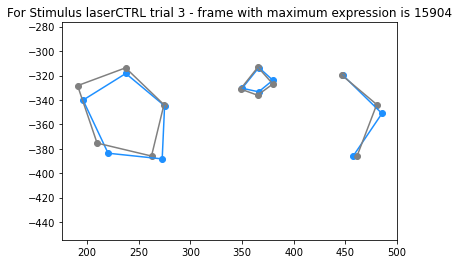

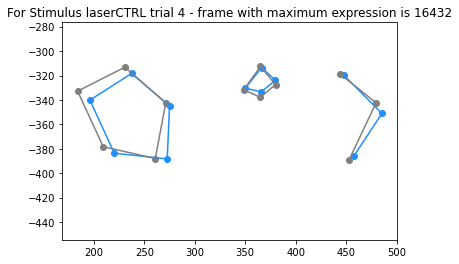

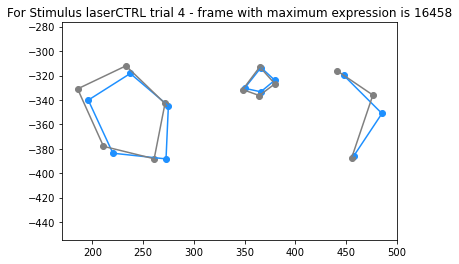

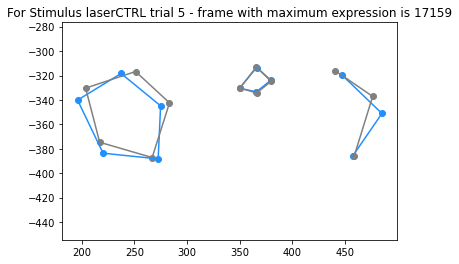

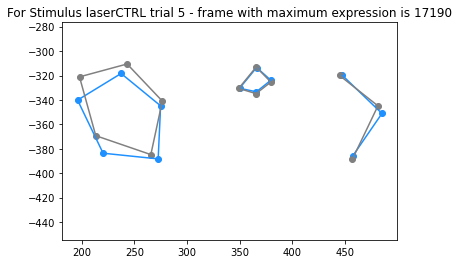

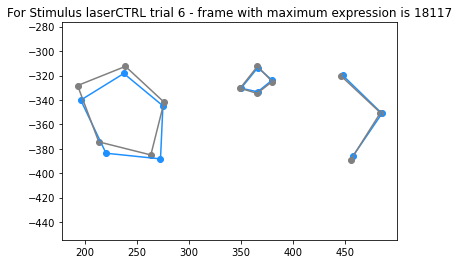

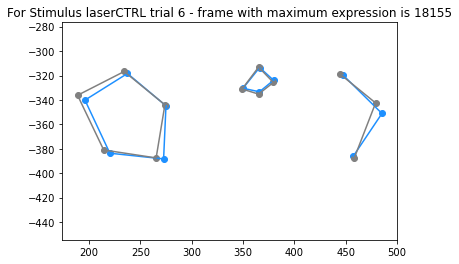

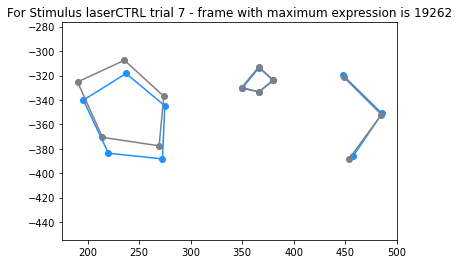

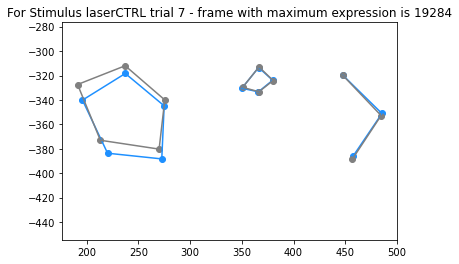

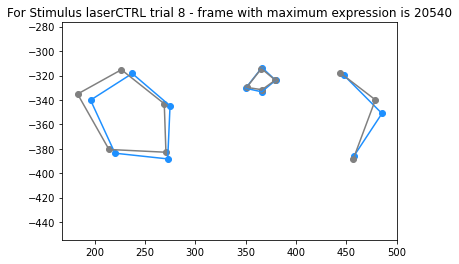

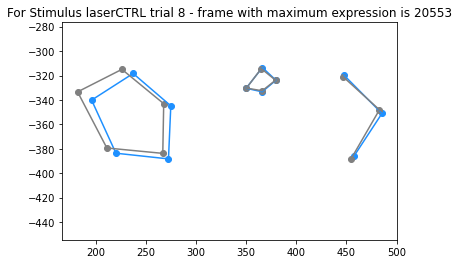

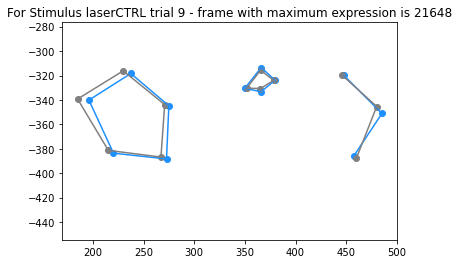

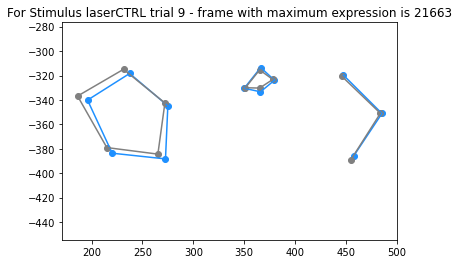

Frame of Maximum Expression
  laserHI laserLO laserCTRL
0   12916   12628     13285
1   14242   13585     13920
2   14714   14471     15046
3   15609   15327     15873
4   16154   16821     16432
5   17746   17466     17159
6   18407   18634     18117
7   19563   18968     19262
8   19861   20242     20540
9   20804   21333     21648
  laserHI laserLO laserCTRL
0   12945   12639     13288
1   14280   13601     13940
2   14748   14494     15078
3   15625   15346     15904
4   16173   16834     16458
5   17768   17500     17190
6   18432   18655     18155
7   19592   18984     19284
8   19889   20254     20553
9   20815   21357     21663


In [63]:
#Function plotting maximal Mahalanobis facial expression vs fixed baseline
def mahalanobis_maximal_laser_two_intervals(batch, animall):
    df = pd.read_csv("Batch" + str(batch) + "/OutputAnimal" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_start = pd.read_csv("Batch" + str(batch) + "/list_start" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_end = pd.read_csv("Batch" + str(batch) + "/list_end" + str(batch) + str(animall) + ".csv", index_col = 0)
    my_baseline = pd.read_csv("Batch" + str(batch) + "/BaselineExpression" + str(batch) + str(animall) + ".csv", index_col = 0)
    
    #covariance matrix for Mahalanobis distance
    copy_df = pd.DataFrame.copy(df, deep = True)
    copy_df = copy_df.dropna()
    cov = np.cov(copy_df.values.T)
    inv_cov = np.linalg.inv(cov)
    
    list_start = list_start.drop(columns = ["shock","shockCTRL","squeak","squeakCTRL"])
    print(list_start)
    max_expression = pd.DataFrame(index = list_start.index, columns = list_start.columns)
    max_expression2 = pd.DataFrame(index = list_start.index, columns = list_start.columns)
    for y in list_start.columns:
        for z in list_start.index:
            maxx = 0
            flag = 0
            for frame in range(int(list_start.at[z,y]),int(list_start.at[z,y])+15):
                summ = distance.mahalanobis(df.loc[frame].to_numpy(), my_baseline.loc[0].to_numpy(), inv_cov)
                if(summ > maxx):
                    maxx = summ
                    flag = frame
            max_expression.at[z,y] = flag
            #print(distance.mahalanobis(df.loc[flag].to_numpy(), my_baseline.loc[0].to_numpy(), inv_cov))
            plt.title("For Stimulus " + str(y)+" trial "+str(z) + " - frame with maximum expression is " + str(flag))
            plot(my_baseline, 0, 'dodgerblue', batch)
            plot(df, flag, colors.get(y), batch)
            plt.show()
            
            maxx = 0
            flag = 0
            for frame in range(int(list_start.at[z,y])+15,int(list_start.at[z,y])+40):
                summ = distance.mahalanobis(df.loc[frame].to_numpy(), my_baseline.loc[0].to_numpy(), inv_cov)
                if(summ > maxx):
                    maxx = summ
                    flag = frame
            max_expression2.at[z,y] = flag
            #print(distance.mahalanobis(df.loc[flag].to_numpy(), my_baseline.loc[0].to_numpy(), inv_cov))
            plt.title("For Stimulus " + str(y)+" trial "+str(z) + " - frame with maximum expression is " + str(flag))
            plot(my_baseline, 0, 'dodgerblue', batch)
            plot(df, flag, colors.get(y), batch)
            plt.show()
    print("Frame of Maximum Expression")
    print(max_expression)
    print(max_expression2)
    max_expression.to_csv("Batch" + str(batch) + "/laser1_Frames_Maximal_Expressions_Animal" + str(batch) + str(animall) + ".csv")
    max_expression2.to_csv("Batch" + str(batch) + "/laser2_Frames_Maximal_Expressions_Animal" + str(batch) + str(animall) + ".csv")
    
    
mahalanobis_maximal_laser_two_intervals(batch = "2", animall = "3")

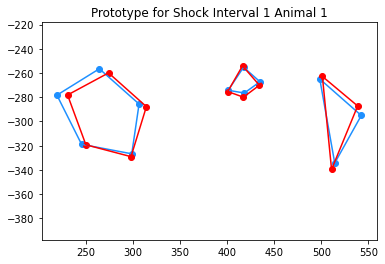

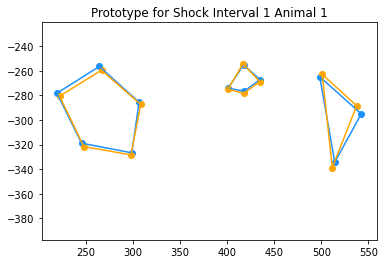

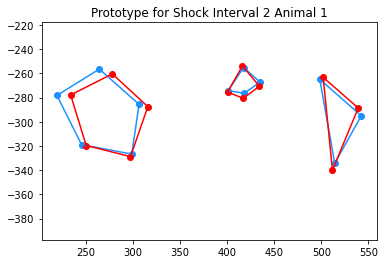

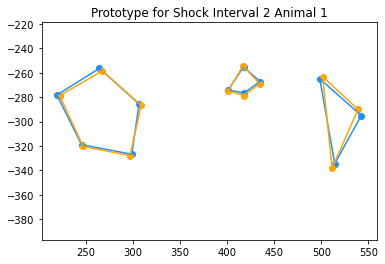

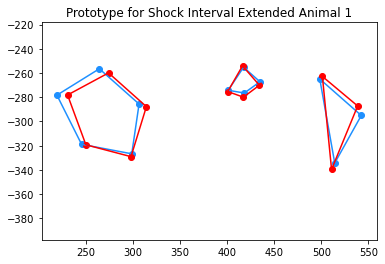

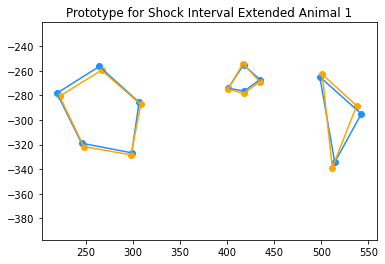

(            Ear1.X   Ear1.Y   Ear2.X   Ear2.Y   Ear3.X   Ear3.Y   Ear4.X  \
 shock      314.167  287.754  273.989  259.872  230.462  278.127  249.923   
 shockCTRL  308.174  287.382   266.54  259.557  221.974  280.682  247.738   
 
             Ear4.Y   Ear5.X   Ear5.Y  ...   Eye3.X   Eye3.Y   Eye4.X   Eye4.Y  \
 shock       319.26  297.825   329.06  ...  400.558  275.286  417.217  279.924   
 shockCTRL  321.603  297.778  328.378  ...  400.937  274.862  417.704  278.411   
 
           SnoutMid.X SnoutMid.Y NoseTip.X NoseTip.Y  Mouth.X  Mouth.Y  
 shock        501.041    262.796   538.496   287.194  510.787  339.623  
 shockCTRL    500.863    262.901    537.42   288.417   511.56    338.7  
 
 [2 rows x 24 columns],
             Ear1.X   Ear1.Y   Ear2.X   Ear2.Y   Ear3.X   Ear3.Y   Ear4.X  \
 shock      315.711  287.523  277.996  260.451  233.739  277.867  250.246   
 shockCTRL  308.648  286.719  267.372  258.429  222.055  278.809  247.023   
 
             Ear4.Y   Ear5.X   Ear5.Y  ..

In [16]:
# prototype defined as average of maximal expressions across trials of a certain stimulus
def prototype_mahalanobis_shock_two_intervals(batch, animall):
    df = pd.read_csv("Batch" + str(batch) + "/OutputAnimal" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_start = pd.read_csv("Batch" + str(batch) + "/list_start" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_end = pd.read_csv("Batch" + str(batch) + "/list_end" + str(batch) + str(animall) + ".csv", index_col = 0)
    my_baseline = pd.read_csv("Batch" + str(batch) + "/BaselineExpression" + str(batch) + str(animall) + ".csv", index_col = 0)
    max_expression_times1 = pd.read_csv("Batch" + str(batch) + "/shock1_Frames_Maximal_Expressions_Animal" + str(batch) + str(animall) + ".csv", index_col = 0)
    max_expression_times2 = pd.read_csv("Batch" + str(batch) + "/shock2_Frames_Maximal_Expressions_Animal" + str(batch) + str(animall) + ".csv", index_col = 0)
    #covariance matrix for Mahalanobis distance
    copy_df = pd.DataFrame.copy(df, deep = True)
    copy_df = copy_df.dropna()
    cov = np.cov(copy_df.values.T)
    inv_cov = np.linalg.inv(cov)
    
    list_start = list_start.drop(columns = ["laserHI","laserLO","laserCTRL","squeak","squeakCTRL"])
    prototypes_animal1 = pd.DataFrame(index = list_start.columns, columns = my_baseline.columns)
    for y in list_start.columns:
        max_expr = pd.DataFrame(columns = df.columns, index = list_start.index)
        for z in list_start.index:
            max_expr.loc[z,:] = df.loc[max_expression_times1.at[z,y],:]
        prototype = pd.DataFrame(max_expr.mean()).T
        plot(my_baseline,0,'dodgerblue', batch)
        plot(prototype,0,colors.get(y), batch)
        plt.title("Prototype for Shock Interval 1 Animal " + animall)
        plt.show()
        prototypes_animal1.loc[y,:] = prototype.loc[0,:]
    
    prototypes_animal2 = pd.DataFrame(index = list_start.columns, columns = my_baseline.columns)
    for y in list_start.columns:
        max_expr = pd.DataFrame(columns = df.columns, index = list_start.index)
        for z in list_start.index:
            max_expr.loc[z,:] = df.loc[max_expression_times2.at[z,y],:]
        prototype = pd.DataFrame(max_expr.mean()).T
        plot(my_baseline,0,'dodgerblue',batch)
        plot(prototype,0,colors.get(y),batch)
        plt.title("Prototype for Shock Interval 2 Animal "  + animall)
        plt.show()
        prototypes_animal2.loc[y,:] = prototype.loc[0,:]
        
    prototypes_animal_extended = pd.DataFrame(index = list_start.columns, columns = my_baseline.columns)
    for y in list_start.columns:
        max_expr = pd.DataFrame(columns = df.columns, index = list_start.index)
        for z in list_start.index:
            if(distance.mahalanobis(df.loc[max_expression_times1.at[z,y]].to_numpy(), my_baseline.loc[0].to_numpy(), inv_cov) >= distance.mahalanobis(df.loc[max_expression_times1.at[z,y]].to_numpy(), my_baseline.loc[0].to_numpy(), inv_cov)):
                max_expr.loc[z,:] = df.loc[max_expression_times1.at[z,y],:]
            else:
                max_expr.loc[z,:] = df.loc[max_expression_times2.at[z,y],:]
        prototype = pd.DataFrame(max_expr.mean()).T
        plot(my_baseline,0,'dodgerblue',batch)
        plot(prototype,0,colors.get(y),batch)
        plt.title("Prototype for Shock Interval Extended Animal "  + animall)
        plt.show()
        prototypes_animal_extended.loc[y,:] = prototype.loc[0,:]
        
    return prototypes_animal1, prototypes_animal2, prototypes_animal_extended
prototype_mahalanobis_shock_two_intervals("2", "1")

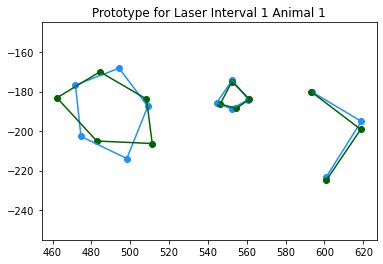

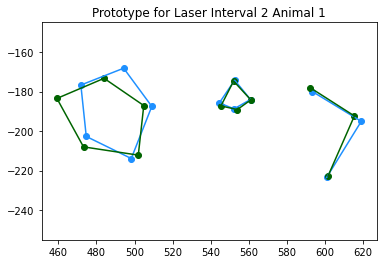

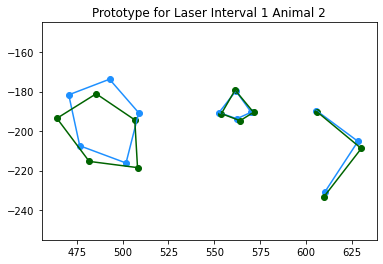

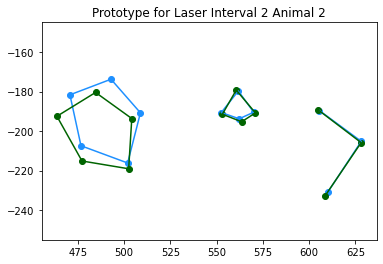

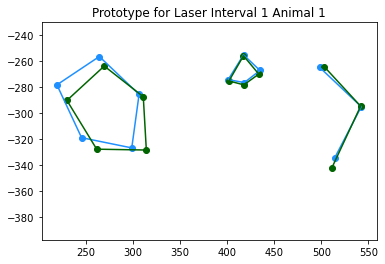

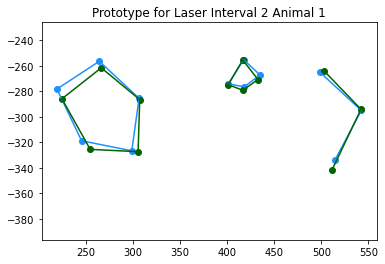

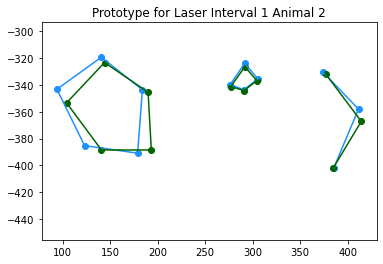

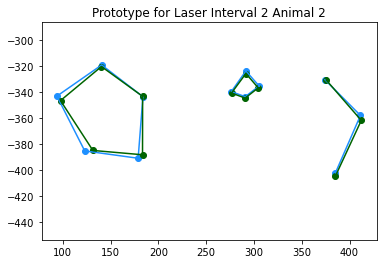

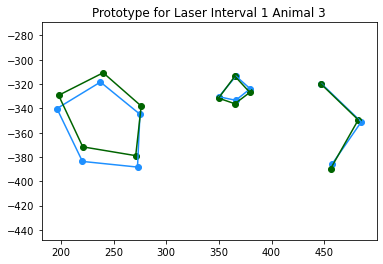

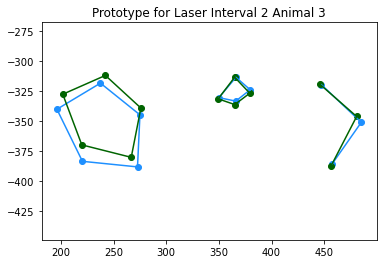

(          Ear1.X  Ear1.Y   Ear2.X   Ear2.Y   Ear3.X   Ear3.Y   Ear4.X  \
 laserHI  276.143  338.08  239.975  310.693  197.597  329.256  220.562   
 
           Ear4.Y   Ear5.X   Ear5.Y  ...   Eye3.X   Eye3.Y   Eye4.X   Eye4.Y  \
 laserHI  371.633  270.906  378.875  ...  349.636  331.591  365.168  336.167   
 
         SnoutMid.X SnoutMid.Y NoseTip.X NoseTip.Y  Mouth.X  Mouth.Y  
 laserHI    446.772    319.698    482.47   349.426  456.139  389.639  
 
 [1 rows x 24 columns],
          Ear1.X   Ear1.Y   Ear2.X   Ear2.Y   Ear3.X   Ear3.Y   Ear4.X  \
 laserHI  275.82  339.129  242.083  311.917  201.563  327.607  219.661   
 
           Ear4.Y   Ear5.X   Ear5.Y  ...   Eye3.X   Eye3.Y   Eye4.X   Eye4.Y  \
 laserHI  369.887  266.645  380.288  ...  349.315  331.466  365.035  336.231   
 
         SnoutMid.X SnoutMid.Y NoseTip.X NoseTip.Y  Mouth.X  Mouth.Y  
 laserHI     446.04      319.3   480.944   346.188  456.445  387.768  
 
 [1 rows x 24 columns])

In [66]:
# prototype defined as average of maximal expressions across trials of a certain stimulus
# Expression in the second interval, after initial response to pain could be freezing expressions
def prototype_mahalanobis_laser_two_intervals(batch, animall):
    df = pd.read_csv("Batch" + str(batch) + "/OutputAnimal" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_start = pd.read_csv("Batch" + str(batch) + "/list_start" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_end = pd.read_csv("Batch" + str(batch) + "/list_end" + str(batch) + str(animall) + ".csv", index_col = 0)
    my_baseline = pd.read_csv("Batch" + str(batch) + "/BaselineExpression" + str(batch) + str(animall) + ".csv", index_col = 0)
    max_expression_times1 = pd.read_csv("Batch" + str(batch) + "/laser1_Frames_Maximal_Expressions_Animal" + str(batch) + str(animall) + ".csv", index_col = 0)
    max_expression_times2 = pd.read_csv("Batch" + str(batch) + "/laser2_Frames_Maximal_Expressions_Animal" + str(batch) + str(animall) + ".csv", index_col = 0)
    #covariance matrix for Mahalanobis distance
    copy_df = pd.DataFrame.copy(df, deep = True)
    copy_df = copy_df.dropna()
    cov = np.cov(copy_df.values.T)
    inv_cov = np.linalg.inv(cov)
    
    list_start = list_start.drop(columns = ["laserLO","laserCTRL","shock","shockCTRL","squeak","squeakCTRL"])
    prototypes_animal1 = pd.DataFrame(index = list_start.columns, columns = my_baseline.columns)
    for y in list_start.columns:
        max_expr = pd.DataFrame(columns = df.columns, index = list_start.index)
        for z in list_start.index:
            max_expr.loc[z,:] = df.loc[max_expression_times1.at[z,y],:]
        prototype = pd.DataFrame(max_expr.mean()).T
        plot(my_baseline,0,'dodgerblue', batch)
        plot(prototype,0,colors.get(y), batch)
        plt.title("Prototype for Laser Interval 1 Animal " + animall)
        plt.show()
        prototypes_animal1.loc[y,:] = prototype.loc[0,:]
    
    prototypes_animal2 = pd.DataFrame(index = list_start.columns, columns = my_baseline.columns)
    for y in list_start.columns:
        max_expr = pd.DataFrame(columns = df.columns, index = list_start.index)
        for z in list_start.index:
            max_expr.loc[z,:] = df.loc[max_expression_times2.at[z,y],:]
        prototype = pd.DataFrame(max_expr.mean()).T
        plot(my_baseline,0,'dodgerblue',batch)
        plot(prototype,0,colors.get(y),batch)
        plt.title("Prototype for Laser Interval 2 Animal "  + animall)
        plt.show()
        prototypes_animal2.loc[y,:] = prototype.loc[0,:]
        
    return prototypes_animal1, prototypes_animal2
prototype_mahalanobis_laser_two_intervals("1", "1")
prototype_mahalanobis_laser_two_intervals("1", "2")
prototype_mahalanobis_laser_two_intervals("2", "1")
prototype_mahalanobis_laser_two_intervals("2", "2")
prototype_mahalanobis_laser_two_intervals("2", "3")

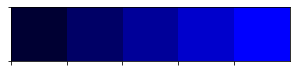

In [10]:
import colorsys
import matplotlib
def scale_lightness(rgb, scale_l):
    # convert rgb to hls
    h, l, s = colorsys.rgb_to_hls(*rgb)
    # manipulate h, l, s values and return as rgb
    return colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)
import seaborn as sns
rgbs = [scale_lightness(matplotlib.colors.ColorConverter.to_rgb("blue"), scale) for scale in [0.2, .4,0.6, 0.8, 1]]
sns.palplot(rgbs)

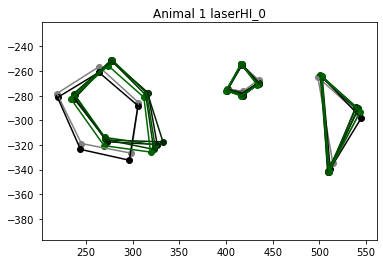

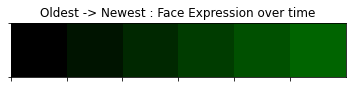

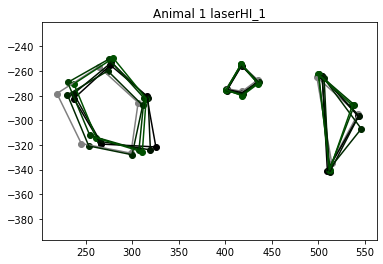

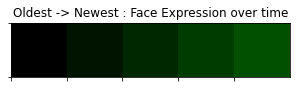

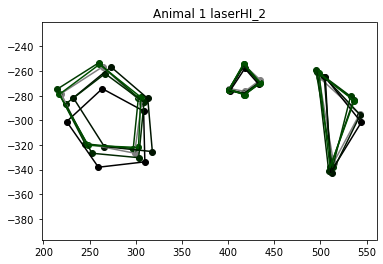

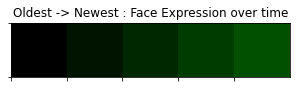

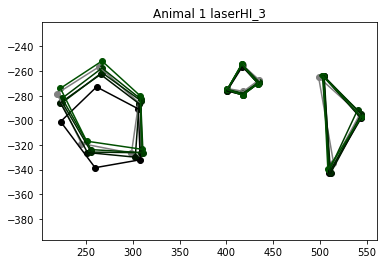

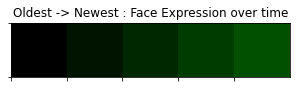

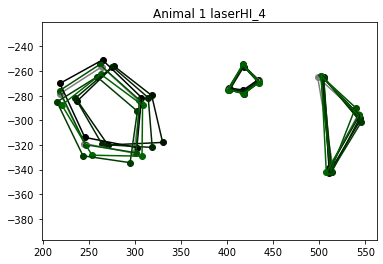

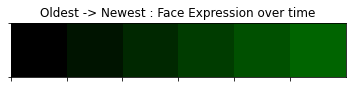

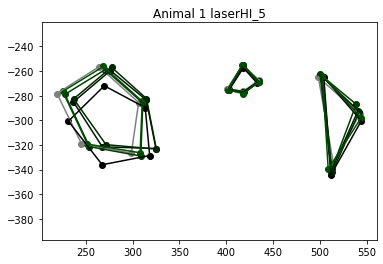

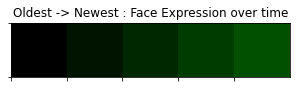

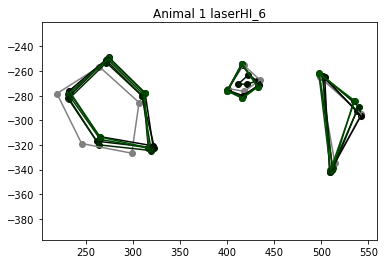

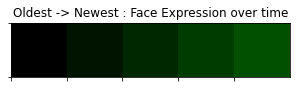

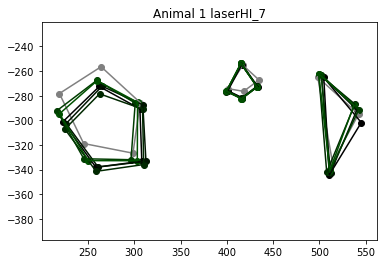

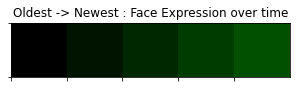

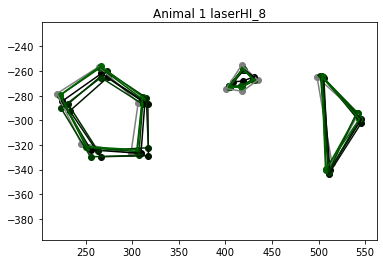

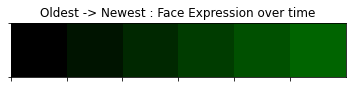

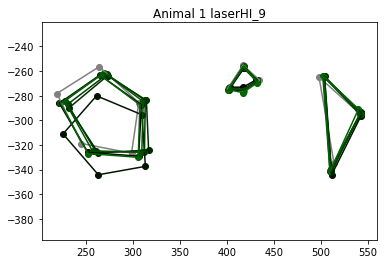

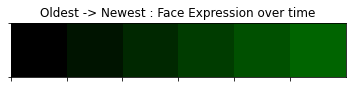

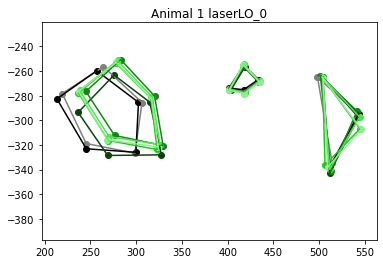

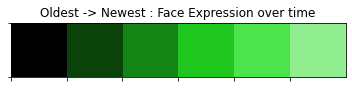

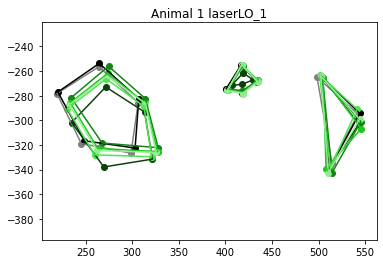

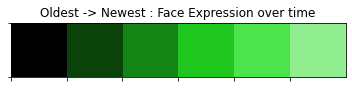

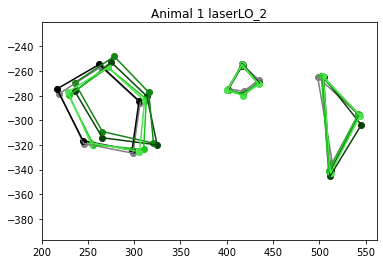

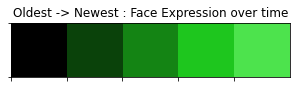

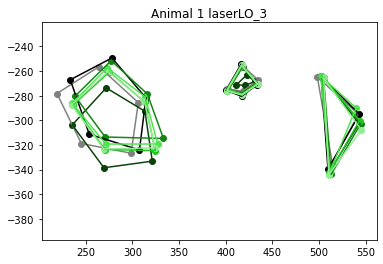

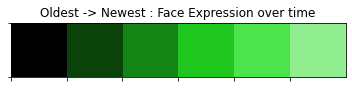

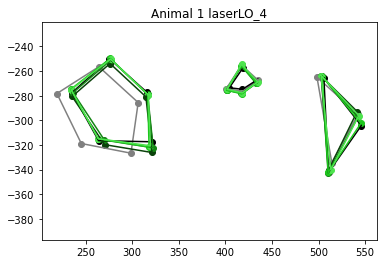

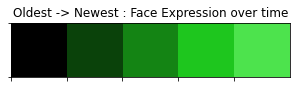

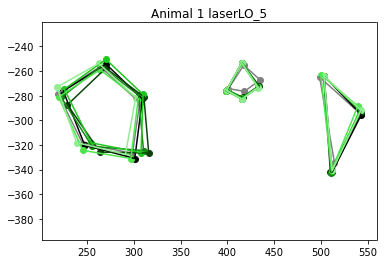

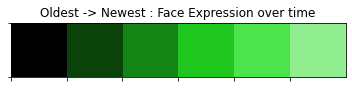

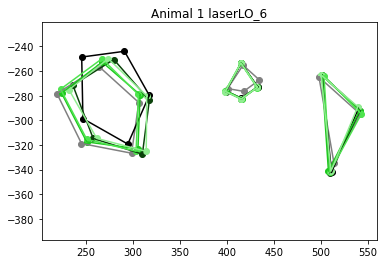

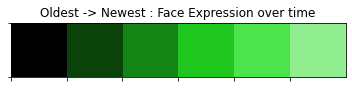

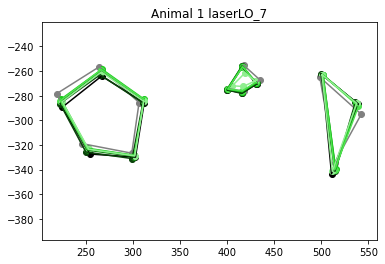

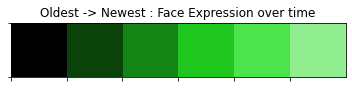

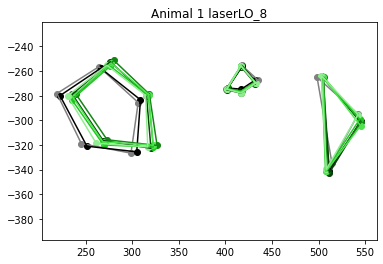

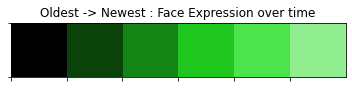

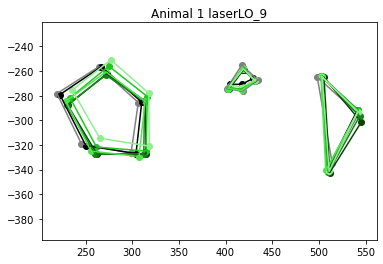

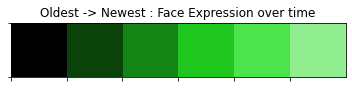

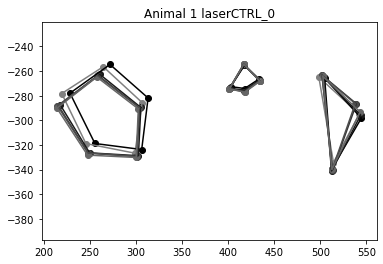

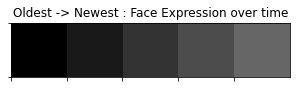

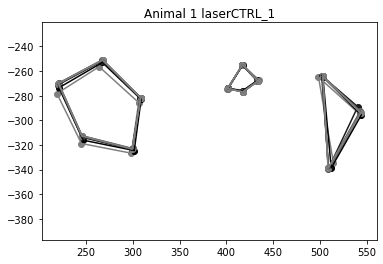

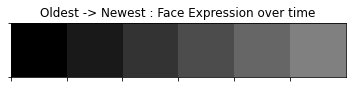

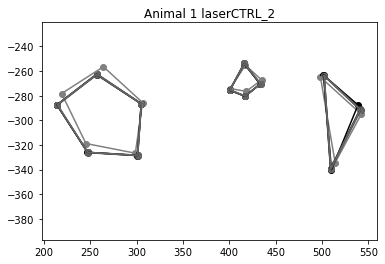

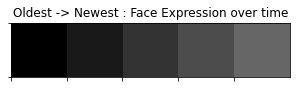

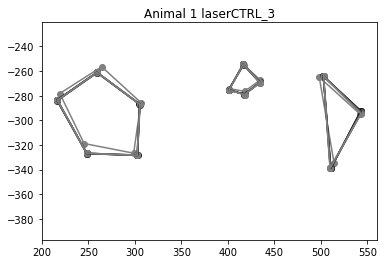

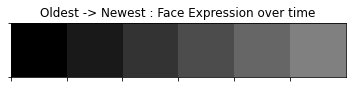

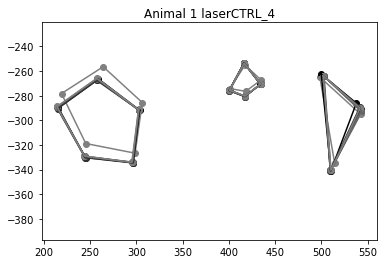

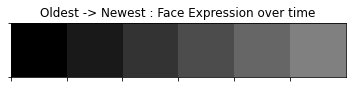

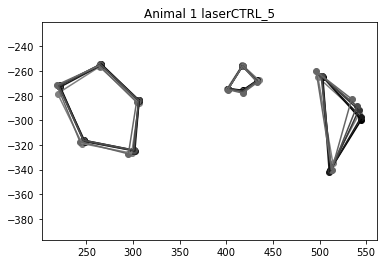

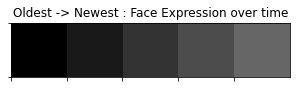

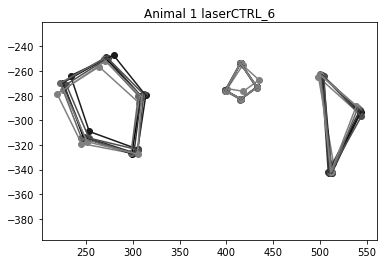

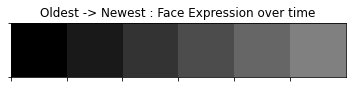

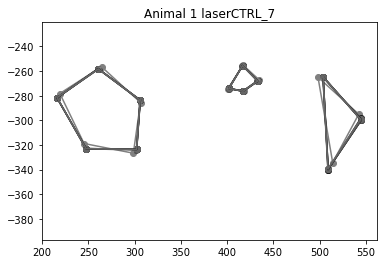

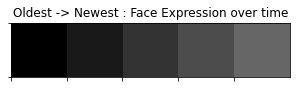

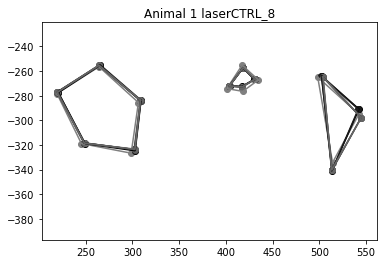

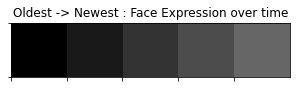

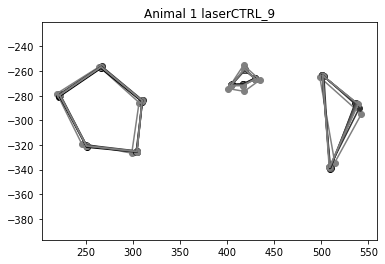

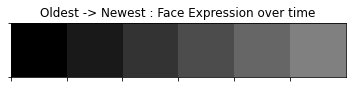

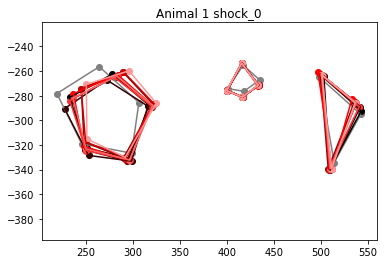

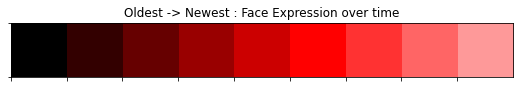

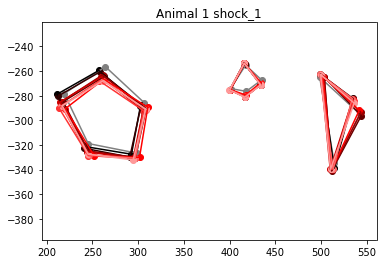

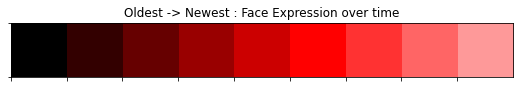

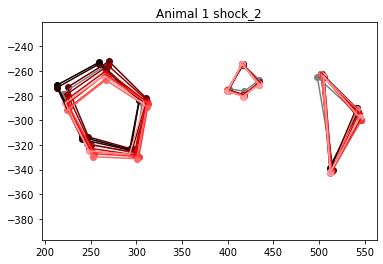

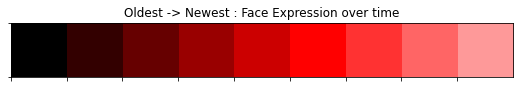

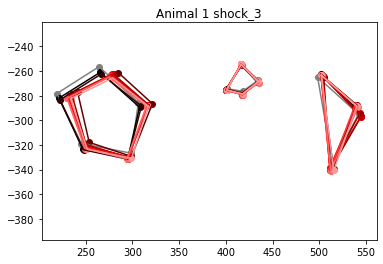

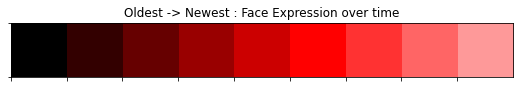

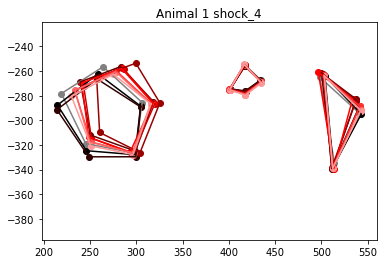

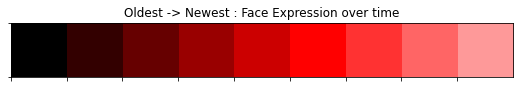

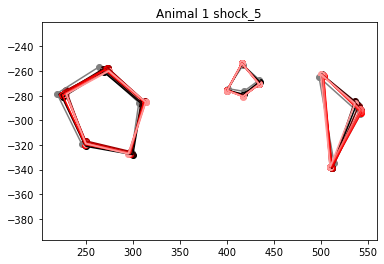

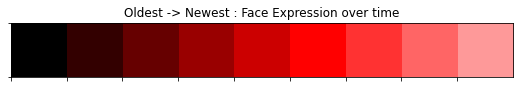

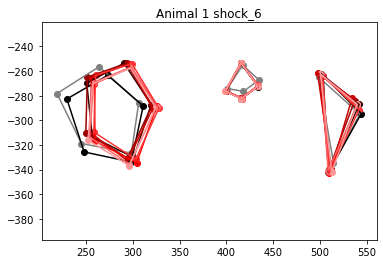

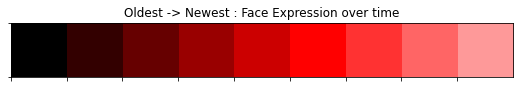

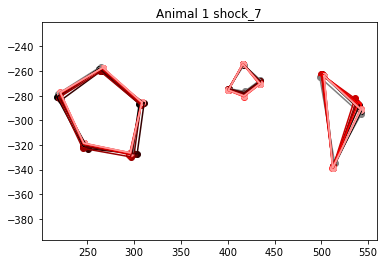

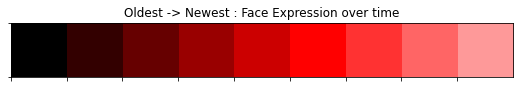

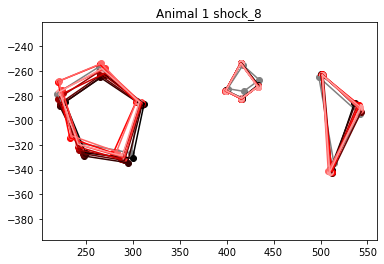

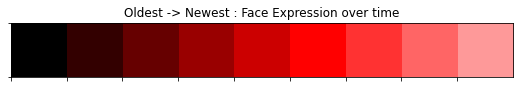

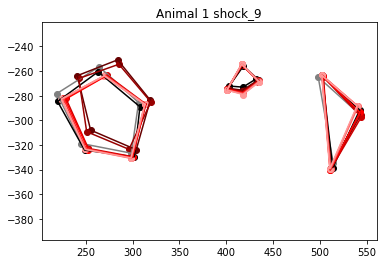

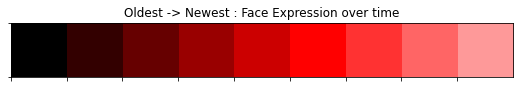

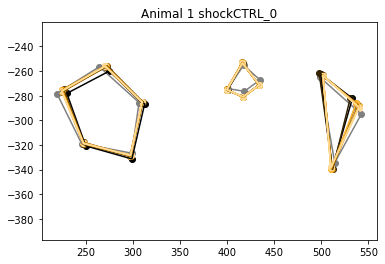

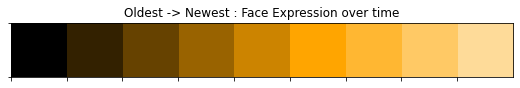

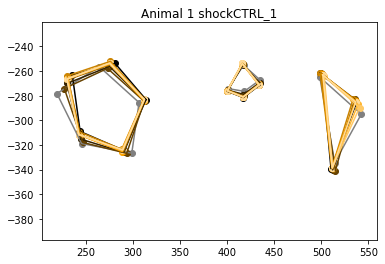

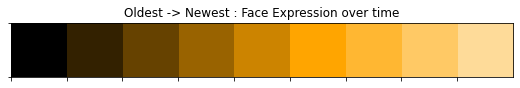

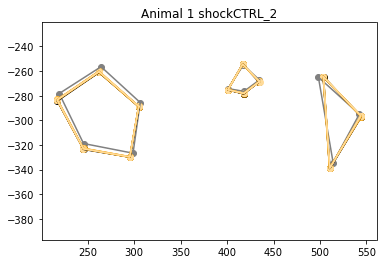

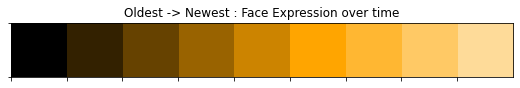

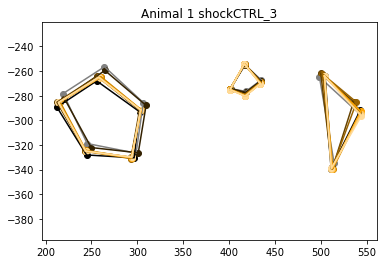

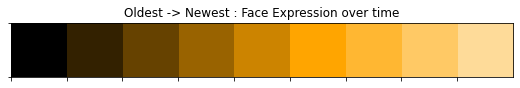

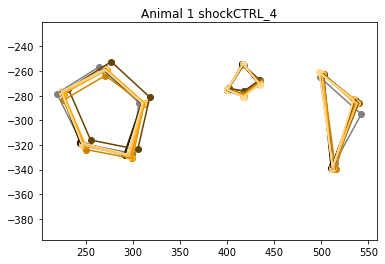

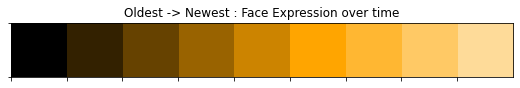

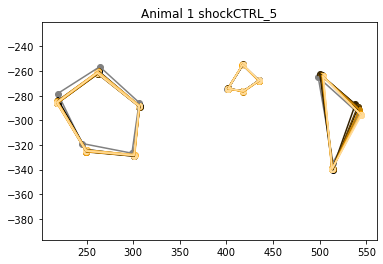

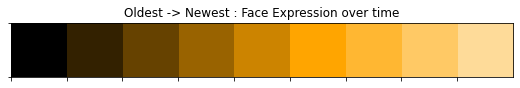

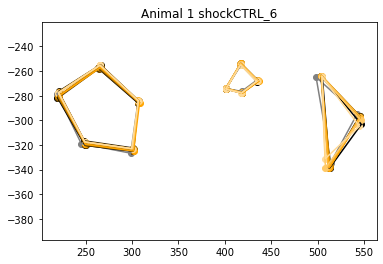

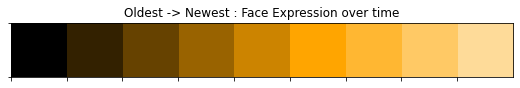

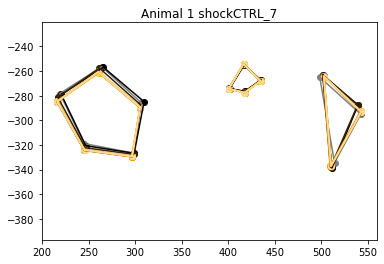

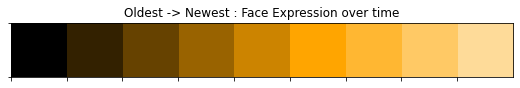

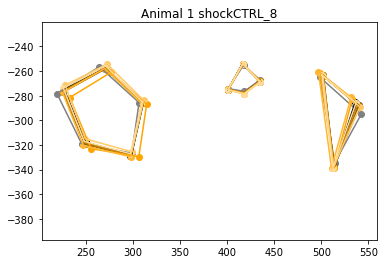

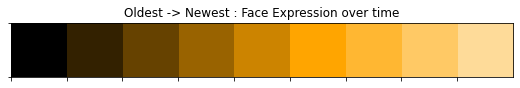

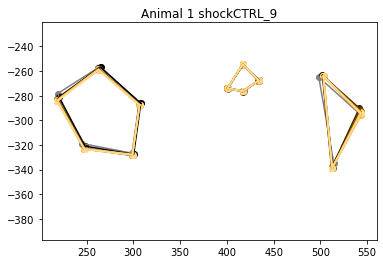

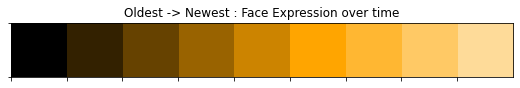

In [18]:
#Plotting facial expression OVER TIME
from scipy.spatial import distance
def facial_expressions_trajectories_time(batch, animall):
    df = pd.read_csv("Batch" + str(batch) + "/OutputAnimal" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_start = pd.read_csv("Batch" + str(batch) + "/list_start" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_end = pd.read_csv("Batch" + str(batch) + "/list_end" + str(batch) + str(animall) + ".csv", index_col = 0)
    my_baseline = pd.read_csv("Batch" + str(batch) + "/BaselineExpression" + str(batch) + str(animall) + ".csv", index_col = 0)
    max_expression_times = pd.read_csv("Batch" + str(batch) + "/Frames_Maximal_Expressions_Animal" + str(batch) + str(animall) + ".csv", index_col = 0)
    
    list_start = list_start.dropna(axis = 1)
    list_start = list_start.drop(columns = ["squeak","squeakCTRL"])
    for y in list_start.columns:
        for z in list_start.index:
            plot(my_baseline, 0, 'gray',batch)
            plt.title("Animal " + str(animall) + " " +str(y)+"_"+str(z))
            inc = 0
            color = []
            for frame in range(int(list_start.at[z,y]),int(list_end.at[z,y]+1)):
                # doing one every 3 frames to be able to see in the plot
                if(frame%3==0):
                    plot(df,frame, scale_lightness(matplotlib.colors.ColorConverter.to_rgb(colors.get(y)),inc),batch)
                    color.append(scale_lightness(matplotlib.colors.ColorConverter.to_rgb(colors.get(y)),inc))
                    inc = inc + 0.2
            sns.palplot(color)
            plt.title("Oldest -> Newest : Face Expression over time")
            plt.show()
            
facial_expressions_trajectories_time("2", "1")         


In [22]:
from scipy.stats import pearsonr
import numpy as np
from scipy.spatial import distance
def similarity_index(batch, animall):
    #Distance between each frame and baseline as a time function for 10 sec after stimulus starts and 3 seconds before
    df = pd.read_csv("Batch" + str(batch) + "/OutputAnimal" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_start = pd.read_csv("Batch" + str(batch) + "/list_start" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_end = pd.read_csv("Batch" + str(batch) + "/list_end" + str(batch) + str(animall) + ".csv", index_col = 0)
    my_baseline = pd.read_csv("Batch" + str(batch) + "/BaselineExpression" + str(batch) + str(animall) + ".csv", index_col = 0)
    max_expressions = pd.read_csv("Batch" + str(batch) + "/Frames_Maximal_Expressions_Animal" + str(batch) + str(animall) + ".csv", index_col = 0)
    prototypes_animal = pd.read_csv("Batch" + str(batch) + "/Prototypes_Animal" + str(batch) + str(animall) + ".csv", index_col = 0 )
    #dropping the missing stimuli for animal 4 - laser
    list_start = list_start.dropna(axis = 1)
    
    #covariance matrix for Mahalanobis distance
    copy_df = pd.DataFrame.copy(df, deep = True)
    copy_df = copy_df.dropna()
    cov = np.cov(copy_df.values.T)
    inv_cov = np.linalg.inv(cov)
    
    #first one is pearson r correlation to prototype, second one is mahalanobis distance to prototype
    similarity = pd.DataFrame(columns = prototypes_animal.index, index = df.index)
    similarity_dist = pd.DataFrame(columns = prototypes_animal.index, index = df.index)
    
    for expr in similarity.columns:
        for ind in similarity.index:
            if(df.loc[ind,:].isna().sum() == 0):
                similarity.at[ind,expr], x = pearsonr(prototypes_animal.loc[expr,:].to_numpy(), df.loc[ind,:].to_numpy())
                similarity_dist.at[ind,expr] = distance.mahalanobis(df.loc[ind,:].to_numpy(), prototypes_animal.loc[expr,:].to_numpy(), inv_cov)
    print(similarity.head())
    
    #baseline prototype as well
    similarity['baseline'] = pd.Series(float)
    similarity_dist['baseline'] = pd.Series(float)
    for ind in similarity.index:
        if(df.loc[ind,:].isna().sum() == 0):
            similarity.at[ind,'baseline'], x = pearsonr(my_baseline.loc[0,:].to_numpy(), df.loc[ind,:].to_numpy())
            similarity_dist.at[ind,'baseline'] = distance.mahalanobis(df.loc[ind,:].to_numpy(), my_baseline.loc[0,:].to_numpy(), inv_cov)
    
    similarity_norm = pd.DataFrame.copy(similarity, deep = True)
    similarity_dist_norm = pd.DataFrame.copy(similarity_dist, deep = True)
    
    
    baseline_index = similarity[similarity['baseline'] == max(similarity['baseline'])].index.tolist()
    baseline_index = baseline_index[0]
    print(baseline_index)
    
    for expr in similarity.columns:
        if(expr != 'baseline'):
            similarity[expr] = similarity[expr] - similarity.at[int(baseline_index),expr]
            similarity_dist[expr] = similarity_dist[expr] - similarity_dist.at[int(baseline_index),expr]
            
    print(similarity.head())
    #var 2 is the one the baseline frame is subtracted, instead of the maximal over an interval
    #nonzeroed means there are still negative values here
    similarity.to_csv('similarity_index_facial_expressions_var2_nonzeroed_animal' + batch + animall + '.csv')
    similarity_dist.to_csv('similarity_dist_facial_expressions_var2_nonzeroed_animal' + batch + animall + '.csv')
    
    #zero-ing
    similarity[similarity < 0] = 0
    similarity_dist[similarity_dist < 0] = 0
    
    print(similarity.head())
    similarity.to_csv('similarity_index_facial_expressions_var2_zeroed_animal' + batch + animall + '.csv')
    similarity_dist.to_csv('similarity_dist_facial_expressions_var2_zeroed_animal' + batch + animall + '.csv')
    
    

similarity_index("1", "1")  
similarity_index("1", "2") 
#similarity_index("2", "1")
similarity_index("2", "2")
similarity_index("2", "3")
similarity_index("2", "4")

    laserHI   laserLO laserCTRL     shock shockCTRL    squeak squeakCTRL
0  0.999873  0.999773  0.999921  0.999314  0.999703  0.999954   0.999968
1  0.999864  0.999771  0.999922  0.999256  0.999668  0.999965   0.999964
2  0.999859  0.999759  0.999917  0.999287  0.999686   0.99996   0.999968
3   0.99986  0.999763  0.999919  0.999277  0.999681  0.999964   0.999968
4  0.999866  0.999773  0.999919   0.99929  0.999693  0.999966   0.999969
570
       laserHI      laserLO    laserCTRL        shock    shockCTRL  \
0  0.000187608  0.000263724  0.000236345 -0.000435989   -0.0002359   
1  0.000179157  0.000261989  0.000237798 -0.000494155 -0.000270821   
2  0.000173653  0.000249207  0.000232325 -0.000462868 -0.000252292   
3  0.000174858  0.000253514   0.00023437 -0.000472702 -0.000257553   
4  0.000181085  0.000264102  0.000234725 -0.000459852   -0.0002451   

        squeak   squeakCTRL  baseline  
0   0.00019377    6.495e-05  0.999886  
1  0.000204912  6.10749e-05  0.999861  
2  0.000200618  6

In [ ]:
# Doing averages of these similarity traces across trials to see if there is time window of response
#Animal 1 
#Distance between each frame and baseline as a time function for 10 sec after stimulus starts and 3 seconds before
# First red star represents when stimulus starts
# Second red star represents approx 3-4 sec from stimulus start
fps = 15.49/3
def similarity_index_averaged(batch, animall,stim,typee):
    #Distance between each frame and baseline as a time function for 10 sec after stimulus starts and 3 seconds before
    df = pd.read_csv("Batch" + str(batch) + "/OutputAnimal" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_start = pd.read_csv("Batch" + str(batch) + "/list_start" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_end = pd.read_csv("Batch" + str(batch) + "/list_end" + str(batch) + str(animall) + ".csv", index_col = 0)
    my_baseline = pd.read_csv("Batch" + str(batch) + "/BaselineExpression" + str(batch) + str(animall) + ".csv", index_col = 0)
    max_expressions = pd.read_csv("Batch" + str(batch) + "/Frames_Maximal_Expressions_Animal" + str(batch) + str(animall) + ".csv", index_col = 0)
    similarity = pd.read_csv('similarity_index_facial_expressions_var2_' + typee + '_animal' + batch + animall + '.csv', index_col = 0)
    similarity_dist = pd.read_csv('similarity_dist_facial_expressions_var2_' + typee '_animal' + batch + animall + '.csv', index_col = 0)
    
    #covariance matrix for Mahalanobis distance
    copy_df = pd.DataFrame.copy(df, deep = True)
    copy_df = copy_df.dropna()
    cov = np.cov(copy_df.values.T)
    inv_cov = np.linalg.inv(cov)
    
    #dropping the missing stimuli for animal 4 - laser
    list_start = list_start.dropna(axis = 1)
    for y in list_start.columns:
        print("Stimulus ", y)
        sim_correlation = pd.DataFrame(index = range(-int(fps*5),int(fps*10)), columns = range(0,10))
        mah_distance = pd.DataFrame(index = range(-int(fps*5),int(fps*10)), columns = range(0,10))
        for z in list_start.index:
            for frame in range(int(list_start.at[z,y])-int(fps*5),int(list_start.at[z,y]) +int(fps*10)):
                mah_distance.at[frame-int(list_start.at[z,y]),z] = similarity_dist.at[frame,stim]
                sim_correlation.at[frame-int(list_start.at[z,y]),z] = similarity.at[frame,stim]
        
        std = []
        for frame in range(-int(fps*5),int(fps*10)):
            listt = mah_distance.loc[frame,:].tolist()
            listt = [x for x in listt if x >= 0]
            std.append(np.std(np.array(listt)))
        diff = []
        summ = []
        avg = mah_distance.mean(axis = 1).tolist()
        for frame in range(0,int(fps*10)+int(fps*5)):
            diff.append(avg[frame]-std[frame])
            summ.append(avg[frame]+std[frame])

        plt.title("Similarity " + expr + " Stimulus " + str(y) + " Animal 1 - Averaged across trials")
        plt.xlabel("Frame from stimulus")
        plt.ylabel("Distance to prototype")
        plt.ylim(2,12)
        plt.axvline(0, c = 'gray')
        plt.axvline(list_end.at[0,y]-list_start.at[0,y],c = 'gray')
        plt.plot(range(-int(fps*5),int(fps*10)), avg, color = "black")
        plt.fill_between(range(-int(fps*5),int(fps*10)), diff, summ, color = colors.get(stim))
        plt.show()

        std = []
        for frame in range(-int(fps*5),int(fps*10)):
            listt = sim_correlation.loc[frame,:].tolist()
            listt = [x for x in listt if x >= 0]
            std.append(np.std(np.array(listt)))
        diff = []
        summ = []
        avg = sim_correlation.mean(axis = 1).tolist()
        for frame in range(0,int(fps*10)+int(fps*5)):
            diff.append(avg[frame]-std[frame])
            summ.append(avg[frame]+std[frame])

        plt.title("Similarity " + expr + " Stimulus " + str(y) + " Animal 1 - Averaged across trials")
        plt.xlabel("Frame from stimulus")
        plt.ylabel("Correlation to prototype")
        plt.axvline(0, c = 'gray')
        plt.axvline(list_end.at[0,y]-list_start.at[0,y],c = 'gray')
        plt.plot(range(-int(fps*5),int(fps*10)), avg, color = "black")
        plt.fill_between(range(-int(fps*5),int(fps*10)), diff, summ, color = colors.get(y))
        plt.show()
similarity_index_averaged("1", "1","laserHI","zeroed")